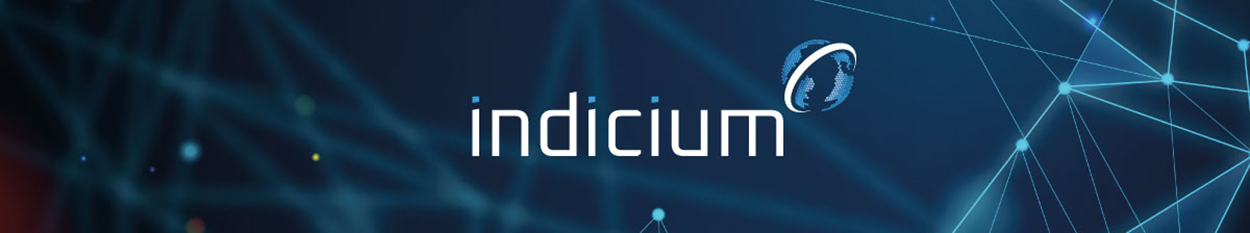

-----------------------------------

<h1><center> <font size="50" face="Verdana"> Desafio Cientista de Dados </center></h1>

## <div align="center" style="font-size: 20px; font-family: Verdana;">Raphael Bezerra Mendes</div>

---------------------------------

In [1]:
import pandas as pd # biblioteca para dados tabulares
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)



#bibliotecas para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#seleciona o tema para o seaborn
sns.set_theme(style="darkgrid")

# biblioteca para cálculos científicos
import numpy as np

Inspecionando o arquivo `cars_train.csv` , observa-se que seu separador é espaçamento por tabulações e sua codificação é `UTF-16 BOM`, assim como o `cars_test.csv`.

In [2]:
#leitura do arquivo base com o conjunto de treino,
# base de dados de um marketplace de compra e venda de carros

base_marketplace = pd.read_csv('cars_train.csv', sep='\t', encoding='utf-16')
print(f"O dataframe importado tem {base_marketplace.shape[0]} registros e {base_marketplace.shape[1]} colunas")

O dataframe importado tem 29584 registros e 29 colunas


In [3]:
base_marketplace.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [4]:
print(base_marketplace.columns)

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao', 'ano_modelo',
       'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor',
       'cidade_vendedor', 'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca',
       'elegivel_revisao', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda',
       'veiculo_alienado', 'preco'],
      dtype='object')


In [5]:
# leitura do arquivo base com o conjunto de teste 
# pátio de carros (sem os preços)

base_catalogo = pd.read_csv('cars_test.csv', sep='\t', encoding='utf-16')
print(f"O dataframe importado tem {base_catalogo.shape[0]} registros e {base_catalogo.shape[1]} colunas")

O dataframe importado tem 9862 registros e 28 colunas


In [6]:
base_catalogo.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado
0,13518783164498355150900635905895481162,8.0,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021.0,20258.0,Manual,4,Hatchback,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN
1,299896161723793383246777788797566040330,18.0,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021.0,53045.0,Manual,2,Picape,N,Branco,PJ,Palmas,Amazonas (AM),Loja,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,316180649972302128246133616457018378621,8.0,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019.0,32486.0,Automática,4,Utilitário esportivo,N,Branco,PF,Goiânia,Goiás (GO),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN
3,222527157104148385909188217274642813298,16.0,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020.0,24937.0,Automática,4,Sedã,N,Cinza,PJ,Presidente Prudente,São Paulo (SP),Loja,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
4,160460343059850745858546502614838368036,8.0,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019.0,62074.0,Automática,4,Sedã,N,Branco,PJ,Limeira,São Paulo (SP),Loja,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN


In [7]:
print(base_catalogo.columns)

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao', 'ano_modelo',
       'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor',
       'cidade_vendedor', 'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca',
       'elegivel_revisao', 'dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda',
       'veiculo_alienado'],
      dtype='object')


As colunas conferem. Agora a checagem dos tipos das colunas, em comparação treino e teste.

In [8]:
base_marketplace.dtypes

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_único_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fábrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
preco               

In [9]:
base_catalogo.dtypes

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_único_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fábrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
dtype: object

### Antes do tratamento, vamos abordar as perguntas de negócio propostas:

#### a) Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

In [10]:
base_marketplace['marca'].value_counts()

VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: marca, dtype: int64

In [11]:
# função para plotar gráfico de barras horizontais vindo da contagem de valores
def plot_barras_horizontais(coluna, dataframe):
    contagem_valores = dataframe[coluna].value_counts()

    # tamanho da figura
    plt.figure(figsize=(10, 8))

    # barras horizontais usando Seaborn
    ax = sns.barplot(x=contagem_valores.values, y=contagem_valores.index)

    # exibir valor das contagens nas barras
    for i, v in enumerate(contagem_valores.values):
        ax.text(v + 3, i, str(v), color='black', ha='left', va='center')

    plt.show()

In [12]:
# função para plotar gráfico de barras horizontais e gráfico de Pareto
def plot_barras_pareto(coluna, dataframe):
    contagem_valores = dataframe[coluna].value_counts()

    # cálculo das frequências cumulativas
    freq_cumulativa = contagem_valores.cumsum() / contagem_valores.sum()

    # tamanho da figura
    plt.figure(figsize=(12, 6))

    # barras horizontais usando Seaborn
    ax1 = plt.subplot(1, 2, 1)
    sns.barplot(x=contagem_valores.values, y=contagem_valores.index)
    plt.xlabel('Contagem')
    plt.ylabel(coluna)

    # gráfico de Pareto (curva cumulativa)
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    ax2.plot(freq_cumulativa, contagem_valores.index, marker='o', color='r')
    ax2.axvline(x=0.8, linestyle='--', color='green')  # linha vertical pontilhada em 80%
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    plt.xlabel('Frequência Cumulativa')
    plt.ylabel(coluna)

    plt.tight_layout()
    plt.show()

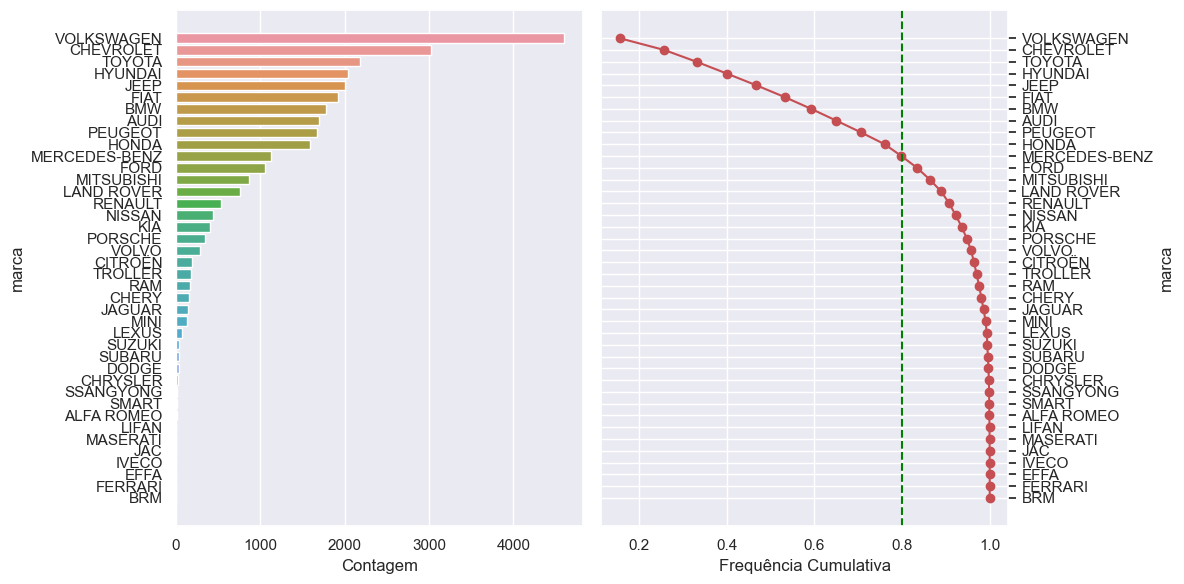

In [13]:
plot_barras_pareto('marca', base_marketplace)

- 12 das 40 marcas acumulam 83% das ocorrências no dataset
- O Top 3 (Volkswagen, Chevrolet e Toyota) são responsáveis por um terço das ocorrências

In [14]:
#usando o top 3 como as marcas mais populares
df_marcas_populares = base_marketplace[base_marketplace['marca'].isin(['VOLKSWAGEN','CHEVROLET','TOYOTA'])]

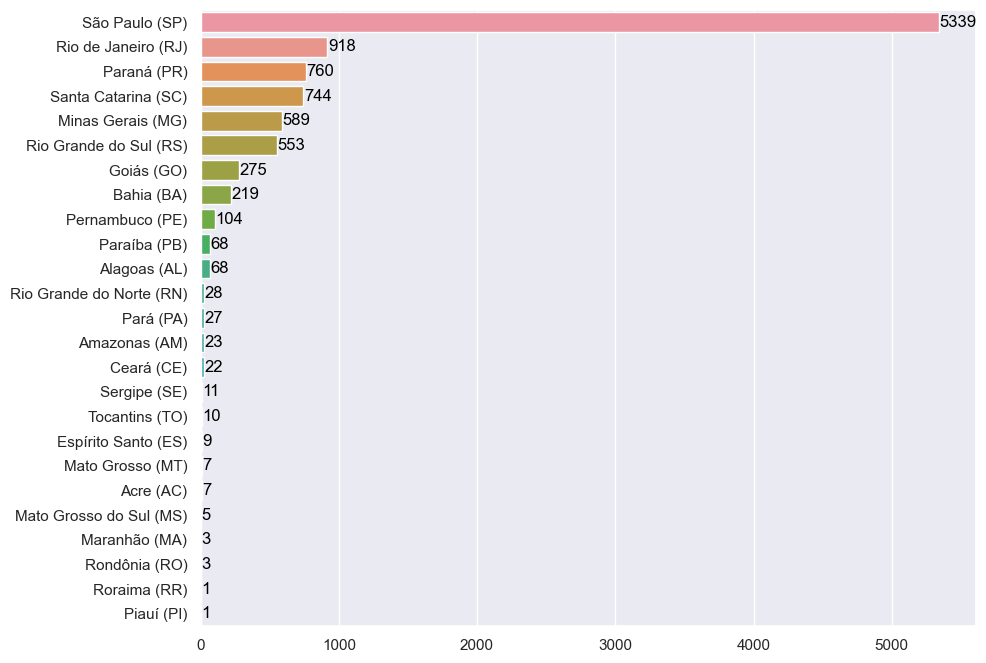

In [15]:
plot_barras_horizontais('estado_vendedor',df_marcas_populares)

In [16]:
valores_medios_por_estado = df_marcas_populares.groupby('estado_vendedor')['preco'].mean().round(0)
valores_total_por_estado = df_marcas_populares.groupby('estado_vendedor')['preco'].sum().round(0)

df_valores_por_estado = pd.DataFrame({
    'estado_vendedor': valores_medios_por_estado.index,
    'valores_medios': valores_medios_por_estado.values,
    'valores_total': valores_total_por_estado.values
})

print(df_valores_por_estado)

             estado_vendedor  valores_medios  valores_total
0                  Acre (AC)         95256.0       666794.0
1               Alagoas (AL)        127834.0      8692689.0
2              Amazonas (AM)         75882.0      1745284.0
3                 Bahia (BA)        118416.0     25933163.0
4                 Ceará (CE)         92524.0      2035534.0
5        Espírito Santo (ES)        104084.0       936758.0
6                 Goiás (GO)        138419.0     38065199.0
7              Maranhão (MA)        131409.0       394227.0
8           Mato Grosso (MT)        147659.0      1033611.0
9    Mato Grosso do Sul (MS)         75720.0       378602.0
10         Minas Gerais (MG)        125158.0     73718102.0
11               Paraná (PR)        134326.0    102087471.0
12              Paraíba (PB)         90137.0      6129345.0
13                 Pará (PA)         96718.0      2611384.0
14           Pernambuco (PE)        101326.0     10537920.0
15                Piauí (PI)        1218

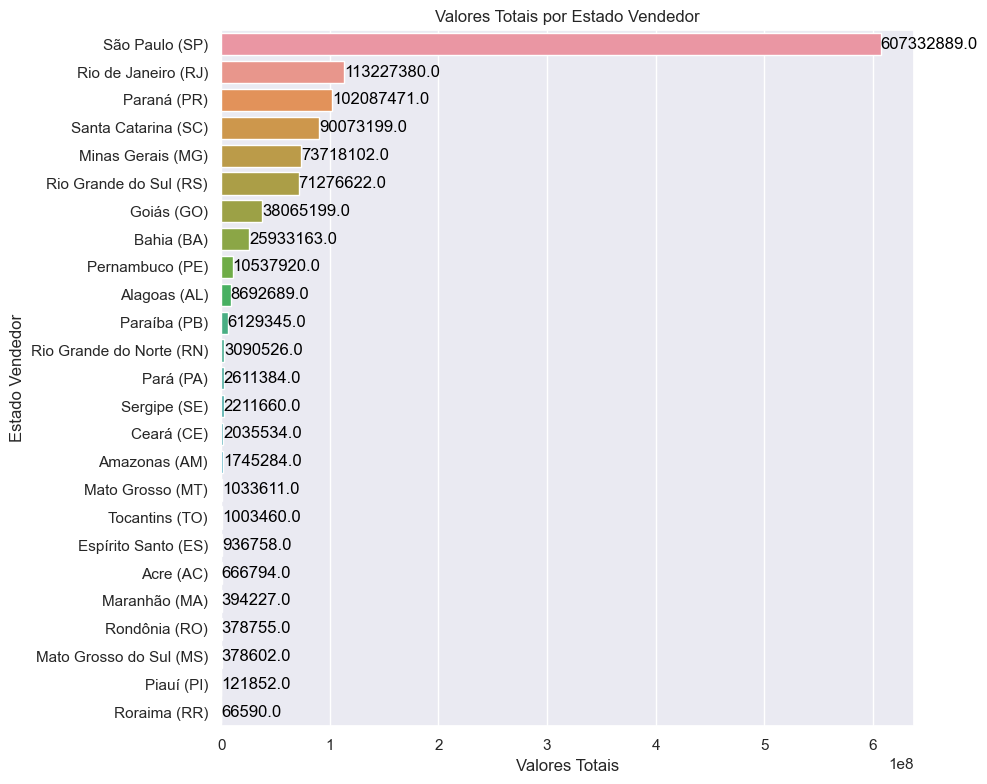

In [17]:
# Ordenar o DataFrame por valores totais em ordem decrescente
df_valores_por_estado = df_valores_por_estado.sort_values(by='valores_total', ascending=False)

# Tamanho da figura
plt.figure(figsize=(10, 8))

# Barras horizontais usando Seaborn
ax = sns.barplot(x='valores_total', y='estado_vendedor', data=df_valores_por_estado)

# Exibir valor das contagens nas barras
for i, v in enumerate(df_valores_por_estado['valores_total']):
    ax.text(v + 3, i, str(v), color='black', ha='left', va='center')

plt.xlabel('Valores Totais')
plt.ylabel('Estado Vendedor')
plt.title('Valores Totais por Estado Vendedor')
plt.tight_layout()
plt.show()

***Considerando as 3 marcas mais vendidas, que juntas possuem um terço do marketshare, `SP` é disparado a melhor praça de vendas com maior frequência e valores brutos no total.***

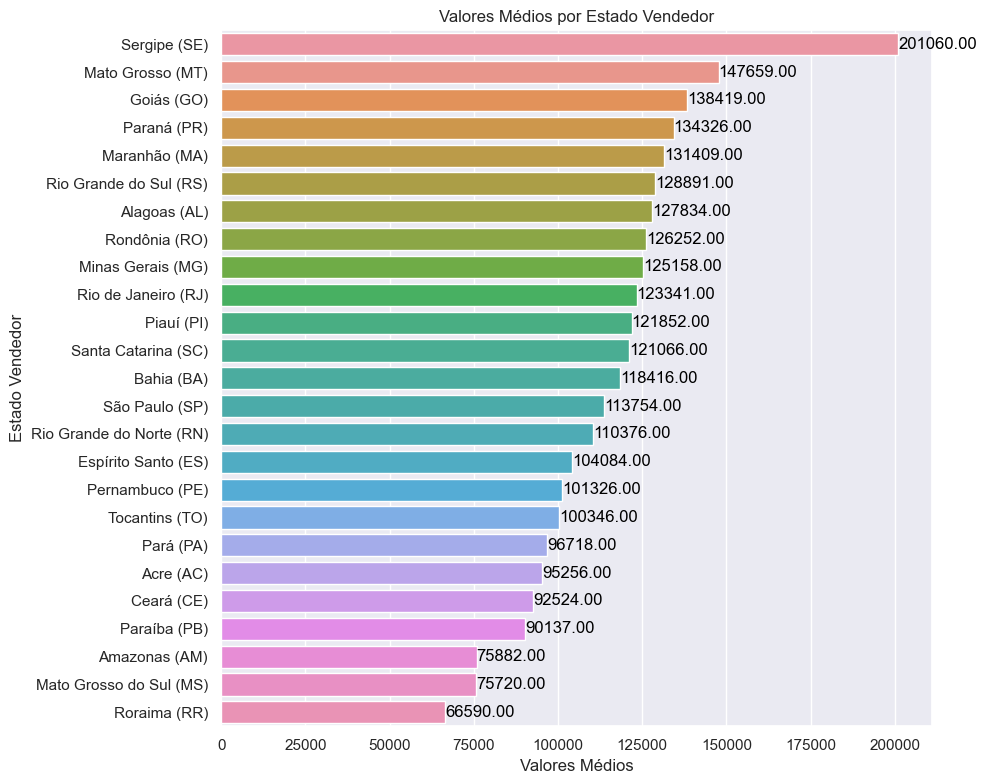

In [18]:
# Ordenar o DataFrame por valores médios em ordem decrescente
df_valores_por_estado = df_valores_por_estado.sort_values(by='valores_medios', ascending=False)

# Tamanho da figura
plt.figure(figsize=(10, 8))

# Barras horizontais usando Seaborn
ax = sns.barplot(x='valores_medios', y='estado_vendedor', data=df_valores_por_estado)

# Exibir valor das contagens nas barras
for i, v in enumerate(df_valores_por_estado['valores_medios']):
    ax.text(v + 3, i, f'{v:.2f}', color='black', ha='left', va='center')

plt.xlabel('Valores Médios')
plt.ylabel('Estado Vendedor')
plt.title('Valores Médios por Estado Vendedor')
plt.tight_layout()
plt.show()

## Pergunta de negócio  1:


***Sergipe***, apesar da menor freqûencia de vendas, merece ser apreciada como foco em veículos de alto valor. 
Junto de **Mato Grosso, Goiás e Paraná***, podem ser alvo de campanhas para atrair compras nesse nicho.

A média dos valores das vendas é bem acima dos valores nacionais.

### b) Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

In [19]:
base_marketplace['cambio'].value_counts()

Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
Name: cambio, dtype: int64

In [20]:
df_picape_automatica = base_marketplace[base_marketplace['cambio']=='Automática']

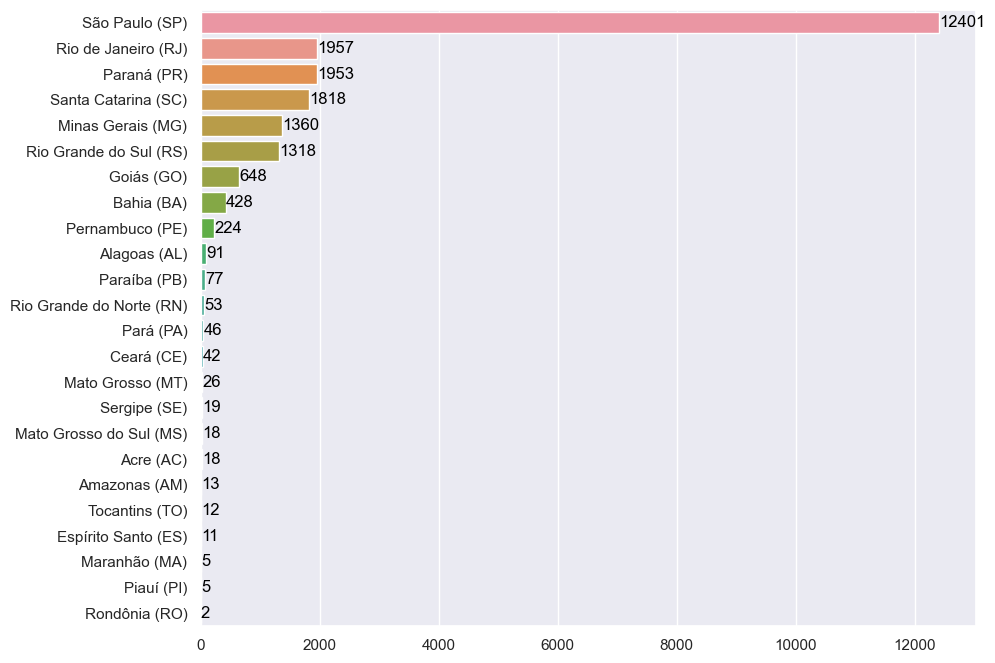

In [21]:
plot_barras_horizontais('estado_vendedor',df_picape_automatica)

Mais uma vez o estado que mais vende é `SP`.

Porém, dada a pergunta sobre melhor para compra, vamos observar onde o preço médio é `menor`

In [22]:
valores_medios_por_estado = df_picape_automatica.groupby('estado_vendedor')['preco'].mean().round(0)
valores_total_por_estado = df_picape_automatica.groupby('estado_vendedor')['preco'].sum().round(0)

df_valores_por_estado = pd.DataFrame({
    'estado_vendedor': valores_medios_por_estado.index,
    'valores_medios': valores_medios_por_estado.values,
    'valores_total': valores_total_por_estado.values
})
df_valores_por_estado = df_valores_por_estado.sort_values(by='valores_medios', ascending=True)
df_valores_por_estado['valores_total'] = df_valores_por_estado['valores_total'].round(0)

print(df_valores_por_estado.round(0))

             estado_vendedor  valores_medios  valores_total
12              Paraíba (PB)        101419.0   7.809244e+06
5        Espírito Santo (ES)        103876.0   1.142633e+06
4                 Ceará (CE)        109736.0   4.608932e+06
0                  Acre (AC)        110602.0   1.990836e+06
19             Rondônia (RO)        112157.0   2.243140e+05
2              Amazonas (AM)        113242.0   1.472152e+06
7              Maranhão (MA)        115487.0   5.774350e+05
9    Mato Grosso do Sul (MS)        126678.0   2.280200e+06
13                 Pará (PA)        131101.0   6.030665e+06
14           Pernambuco (PE)        133503.0   2.990465e+07
23            Tocantins (TO)        136722.0   1.640664e+06
16  Rio Grande do Norte (RN)        137390.0   7.281651e+06
1               Alagoas (AL)        140269.0   1.276447e+07
22            São Paulo (SP)        142410.0   1.766031e+09
20       Santa Catarina (SC)        146677.0   2.666591e+08
3                 Bahia (BA)        1468

A Paraíba é o estado com o menor preço médio para a categoria no país. Para compra é o melhor lugar a se procurar!

## Pergunta de negócio  2:
Qual é o melhor estado para vender carros populares?

No Brasil, é definido `Carro Popular` os modelos com o preço abaixo de R$70.000

In [23]:
#carro popular = preço abaixo de R$70.000
base_carros_populares = base_marketplace[base_marketplace['preco']<70000]

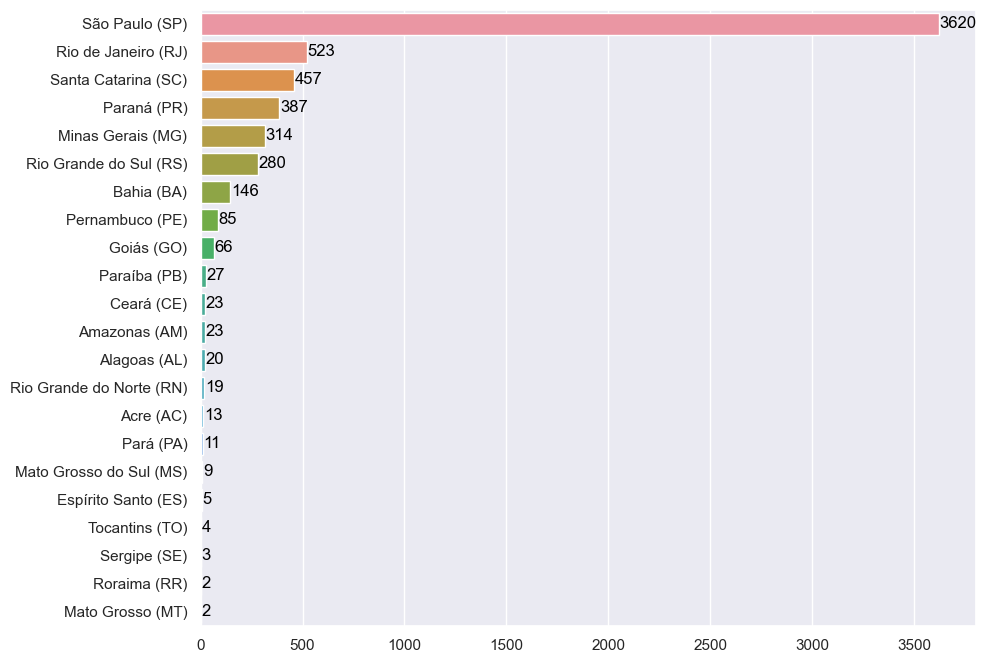

In [24]:
plot_barras_horizontais('estado_vendedor',base_carros_populares)

São Paulo mais uma vez aparce com destaque, dominando o mercado.

### c)	Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [25]:
base_marketplace['garantia_de_fábrica'].unique()

array([nan, 'Garantia de fábrica'], dtype=object)

In [26]:
df_garantia_de_fabrica = base_marketplace[base_marketplace['garantia_de_fábrica']=='Garantia de fábrica']

Seguindo a mesma lógica, o melhor estado para compra é aquele onde são encontrados os melhores preços:

In [27]:
valores_medios_por_estado = df_garantia_de_fabrica.groupby('estado_vendedor')['preco'].mean().round(0)
valores_total_por_estado = df_garantia_de_fabrica.groupby('estado_vendedor')['preco'].sum().round(0)

df_valores_por_estado = pd.DataFrame({
    'estado_vendedor': valores_medios_por_estado.index,
    'valores_medios': valores_medios_por_estado.values,
    'valores_total': valores_total_por_estado.values
})
df_valores_por_estado = df_valores_por_estado.sort_values(by='valores_medios', ascending=True)
df_valores_por_estado['valores_total'] = df_valores_por_estado['valores_total'].round(0)

print(df_valores_por_estado.round(0))

             estado_vendedor  valores_medios  valores_total
11              Paraíba (PB)         95763.0        95763.0
12                 Pará (PA)         98157.0      1668662.0
2              Amazonas (AM)         99617.0       896556.0
5        Espírito Santo (ES)        104030.0       936272.0
8    Mato Grosso do Sul (MS)        121710.0      1582225.0
4                 Ceará (CE)        123940.0       123940.0
14  Rio Grande do Norte (RN)        133120.0      1198084.0
13           Pernambuco (PE)        149898.0      2997968.0
0                  Acre (AC)        150417.0       300834.0
1               Alagoas (AL)        154269.0      8947583.0
9          Minas Gerais (MG)        161206.0     42558456.0
3                 Bahia (BA)        165221.0      8426283.0
19            São Paulo (SP)        166751.0    384694744.0
17       Santa Catarina (SC)        173798.0     57353485.0
6                 Goiás (GO)        174521.0     32460983.0
10               Paraná (PR)        1755

A Paraíba aparece como menor, mas como a média é igual ao total, só há uma venda.
Pára e Amazonas são locais de interesse para as compras de carros dentro da garantia de fábrica.

## Pergunta de negócio 3:

Qual é o modelo de carro mais vendido?

In [28]:
base_veiculos = base_marketplace.copy()

base_veiculos['veiculo'] = base_veiculos['marca'] + base_veiculos['versao'] + base_veiculos['ano_de_fabricacao'].astype(str) + base_veiculos['tipo']

In [29]:
base_veiculos['veiculo'].value_counts()

PEUGEOT1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO2021Sedã    584
PEUGEOT1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO2020Sedã    488
JEEP2.0 16V FLEX LIMITED AUTOMÁTICO2019Sedã              254
JEEP2.0 16V FLEX LIMITED AUTOMÁTICO2020Sedã              245
PEUGEOT1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO2019Sedã    222
                                                        ... 
HONDA2.0 EXL 4X4 16V FLEX 4P AUTOMÁTICO2015Sedã            1
FORD1.6 MPI CLASS HATCH 8V FLEX 4P MANUAL2008Sedã          1
NISSAN1.8 S 16V FLEX 4P MANUAL2014Sedã                     1
CHEVROLET2.0 4X4 16V GASOLINA 4P MANUAL1999Sedã            1
VOLKSWAGEN1.0 200 TSI HIGHLINE AUTOMÁTICO2020Picape        1
Name: veiculo, Length: 6462, dtype: int64

 O sedã `PEUGEOT 1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO` é o carro mais vendido, nas versões de 2020 e 2021!

___________

## Retornando ao tratamento dos dados e a Análise exploratória

Observando a proporção de dados faltantes em cada coluna da base de treino

In [30]:
total_na = base_marketplace.isna().sum()
porcentagem_na = (total_na / len(base_marketplace)) * 100
print(porcentagem_na.round(2))

id                           0.00
num_fotos                    0.60
marca                        0.00
modelo                       0.00
versao                       0.00
ano_de_fabricacao            0.00
ano_modelo                   0.00
hodometro                    0.00
cambio                       0.00
num_portas                   0.00
tipo                         0.00
blindado                     0.00
cor                          0.00
tipo_vendedor                0.00
cidade_vendedor              0.00
estado_vendedor              0.00
anunciante                   0.00
entrega_delivery             0.00
troca                        0.00
elegivel_revisao             0.00
dono_aceita_troca           25.90
veiculo_único_dono          64.77
revisoes_concessionaria     69.00
ipva_pago                   33.55
veiculo_licenciado          46.23
garantia_de_fábrica         85.25
revisoes_dentro_agenda      80.02
veiculo_alienado           100.00
preco                        0.00
dtype: float64

|***Coluna***|***% de valores faltantes***|
|:---|---|
|dono_aceita_troca     |      25.90|
|ipva_pago        |           33.55|
|veiculo_licenciado      |    46.23|
|veiculo_único_dono     |     64.77|
|revisoes_concessionaria  |   69.00|
|garantia_de_fábrica     |    85.25|
|revisoes_dentro_agenda  |    80.02|
|veiculo_alienado      |     100.00|

In [31]:
total_na_teste = base_catalogo.isna().sum()
porcentagem_na_teste = (total_na_teste / len(base_catalogo)) * 100
print(porcentagem_na_teste.round(2))

id                           0.00
num_fotos                    0.61
marca                        0.00
modelo                       0.00
versao                       0.00
ano_de_fabricacao            0.00
ano_modelo                   0.00
hodometro                    0.00
cambio                       0.00
num_portas                   0.00
tipo                         0.00
blindado                     0.00
cor                          0.00
tipo_vendedor                0.00
cidade_vendedor              0.00
estado_vendedor              0.00
anunciante                   0.00
entrega_delivery             0.00
troca                        0.00
elegivel_revisao             0.00
dono_aceita_troca           25.90
veiculo_único_dono          64.76
revisoes_concessionaria     68.90
ipva_pago                   33.44
veiculo_licenciado          45.81
garantia_de_fábrica         85.57
revisoes_dentro_agenda      79.79
veiculo_alienado           100.00
dtype: float64


***PREMISSA*** : a variável `num_fotos` não traz influência causal no cálculo do preço do veículo, logo será descartada.

In [32]:
base_marketplace['entrega_delivery'].value_counts()

False    23601
True      5983
Name: entrega_delivery, dtype: int64

In [33]:
base_marketplace['troca'].value_counts()

False    24523
True      5061
Name: troca, dtype: int64

In [34]:
base_marketplace['elegivel_revisao'].value_counts()

False    29584
Name: elegivel_revisao, dtype: int64

***PREMISSA***:
Na coluna `elegivel_revisao`, somente encontram-se preenchidos os valores negativos.

Como não traz informações, e para não assumir como premissa, será descartada.

In [35]:
# colunas com pelo menos 25% de missings, a coluna ID que é somente um identificador e num_fotos
colunas_descartar = [ "id",
                     "num_fotos",
                     "dono_aceita_troca",
                     "ipva_pago",
                     "veiculo_licenciado",
                     "veiculo_único_dono",
                     "revisoes_concessionaria",
                     "garantia_de_fábrica",
                     "revisoes_dentro_agenda",
                     "veiculo_alienado",
                     "elegivel_revisao"
                    ]


df_treino = base_marketplace.drop(colunas_descartar ,  axis=1)

#também para a base teste
df_teste = base_catalogo.drop(colunas_descartar, axis=1)

Transformando as colulas booleanas para binárias:
* `True = 1`
* `False = 0`


Isso facilitará o aproveitamento dessas colunas como recursos em eventuais modelagens.

In [36]:
# Converte os valores `True` e `False`
# nas colunas `entrega_delivery` e `troca` para os valores numéricos 1 e 0, respectivamente.

colunas_booleanas = ["entrega_delivery", "troca"]

df_treino[colunas_booleanas] = df_treino[colunas_booleanas].replace({True: 1, False: 0})
df_teste[colunas_booleanas]  = df_teste[colunas_booleanas].replace({True: 1, False: 0})

In [37]:
df_treino[['entrega_delivery','troca']].describe().T

,count,mean,std,min,25%,50%,75%,max
entrega_delivery,29584.0,0.202238,0.401675,0.0,0.0,0.0,0.0,1.0
troca,29584.0,0.171072,0.376578,0.0,0.0,0.0,0.0,1.0


In [38]:
print('Shape df_treino:',df_treino.shape)
print('Shape df_teste: ', df_teste.shape)

Shape df_treino: (29584, 18)
Shape df_teste:  (9862, 17)


In [39]:
df_treino.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
ano_de_fabricacao,29584.0,2016.759,4.062,1985.000,2015.000,2018.000,2019.000,2022.000
ano_modelo,29584.0,2017.809,2.674,1997.000,2016.000,2018.000,2020.000,2023.000
hodometro,29584.0,58430.592,32561.769,100.000,31214.000,57434.000,81953.500,390065.000
num_portas,29584.0,3.941,0.338,2.000,4.000,4.000,4.000,4.000
entrega_delivery,29584.0,0.202,0.402,0.000,0.000,0.000,0.000,1.000
troca,29584.0,0.171,0.377,0.000,0.000,0.000,0.000,1.000
preco,29584.0,133023.880,81662.872,9869.951,76571.768,114355.797,163679.617,1359812.892


In [40]:
df_teste.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
ano_de_fabricacao,9862.0,2016.717,4.151,1988.0,2015.00,2018.0,2019.0,2022.0
ano_modelo,9862.0,2017.802,2.680,2007.0,2016.00,2018.0,2020.0,2023.0
hodometro,9862.0,58237.207,32487.019,100.0,31323.25,56742.0,81784.0,381728.0
num_portas,9862.0,3.943,0.334,2.0,4.00,4.0,4.0,4.0
entrega_delivery,9862.0,0.198,0.399,0.0,0.00,0.0,0.0,1.0
troca,9862.0,0.167,0.373,0.0,0.00,0.0,0.0,1.0


Pelo resumo descritivo estatístico, é possivel intuir similaridade do conjunto treino e teste. Essa coerência de valores é benéfica para o processo de modelagem.

In [41]:
df_treino.describe(exclude=['float64','int64']).round(3).T

,count,unique,top,freq
marca,29584,40,VOLKSWAGEN,4594
modelo,29584,457,COMPASS,1480
versao,29584,1916,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,1352
cambio,29584,7,Automática,22545
tipo,29584,7,Sedã,16429
blindado,29584,2,N,29336
cor,29584,7,Branco,20949
tipo_vendedor,29584,2,PF,17926
cidade_vendedor,29584,575,São Paulo,6158
estado_vendedor,29584,25,São Paulo (SP),16378


In [42]:
df_teste.describe(exclude=['float64','int64']).round(3).T

,count,unique,top,freq
marca,9862,39,VOLKSWAGEN,1546
modelo,9862,378,2008,493
versao,9862,1377,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,473
cambio,9862,7,Automática,7528
tipo,9862,8,Sedã,5481
blindado,9862,2,N,9792
cor,9862,6,Branco,6970
tipo_vendedor,9862,2,PF,5931
cidade_vendedor,9862,337,São Paulo,2040
estado_vendedor,9862,24,São Paulo (SP),5416


## Exploração Univariada

In [43]:
df_treino['estado_vendedor'].unique()

array(['São Paulo (SP)', 'Minas Gerais (MG)', 'Rio de Janeiro (RJ)',
       'Santa Catarina (SC)', 'Rio Grande do Sul (RS)',
       'Rio Grande do Norte (RN)', 'Pará (PA)', 'Goiás (GO)',
       'Paraná (PR)', 'Bahia (BA)', 'Pernambuco (PE)', 'Tocantins (TO)',
       'Alagoas (AL)', 'Paraíba (PB)', 'Mato Grosso do Sul (MS)',
       'Amazonas (AM)', 'Mato Grosso (MT)', 'Maranhão (MA)', 'Acre (AC)',
       'Ceará (CE)', 'Sergipe (SE)', 'Roraima (RR)',
       'Espírito Santo (ES)', 'Piauí (PI)', 'Rondônia (RO)'], dtype=object)

In [44]:
#extraindo somente as siglas dos estados
estados = [estado[-3:-1] for estado in df_treino['estado_vendedor']]

In [45]:
df_treino['estado_vendedor'] = estados

In [46]:
df_treino['estado_vendedor'].value_counts()

SP    16378
RJ     2548
PR     2526
SC     2302
MG     1775
RS     1646
GO      789
BA      604
PE      318
AL      125
PB      108
RN       90
PA       74
CE       69
AM       51
MS       35
MT       33
AC       29
SE       24
ES       21
TO       20
MA        7
PI        6
RO        4
RR        2
Name: estado_vendedor, dtype: int64

In [47]:
#transformando o conjunto teste
estados_teste = [estado[-3:-1] for estado in df_teste['estado_vendedor']]
df_teste['estado_vendedor'] = estados_teste

df_teste['estado_vendedor'].value_counts()

SP    5416
PR     854
RJ     836
SC     817
MG     575
RS     545
GO     254
BA     223
PE      93
AL      46
PB      39
PA      33
RN      29
CE      18
MT      15
AM      15
TO      14
MS      11
AC      11
ES       8
SE       5
PI       3
RO       1
RR       1
Name: estado_vendedor, dtype: int64

Inspeção do nome dos estados presentes no conjunto de dados. Nomes e Siglas coerentes.

Para efeito de granularidade, o problema será tratado em nível de Estado e não cidade:

In [48]:
df_treino[(df_treino['estado_vendedor']=="SP")&(df_treino['cidade_vendedor']!="São Paulo")].describe(exclude='float64').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
marca,10220,37,VOLKSWAGEN,1575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modelo,10220,367,2008,512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versao,10220,1239,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ano_de_fabricacao,10220.0,NaN,NaN,NaN,2016.677006,4.107504,1988.0,2015.0,2018.0,2019.0,2022.0
cambio,10220,7,Automática,7764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_portas,10220.0,NaN,NaN,NaN,3.949902,0.311622,2.0,4.0,4.0,4.0,4.0
tipo,10220,6,Sedã,5802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blindado,10220,2,N,10070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cor,10220,5,Branco,6804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_vendedor,10220,2,PF,6261,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_treino['cidade_vendedor'][(df_treino['estado_vendedor']=="SP")&(df_treino['cidade_vendedor']!="São Paulo")].unique()

array(['Rio de Janeiro', 'Santos', 'Sorocaba', 'São José do Rio Preto',
       'Taboão da Serra', 'Presidente Prudente', 'Indaiatuba', 'Salvador',
       'Campinas', 'Ribeirão Preto', 'Osasco', 'São Caetano do Sul',
       'Praia Grande', 'Santo André', 'Jundiaí', 'Guarulhos',
       'Feira de Santana', 'Matão', 'Mogi das Cruzes',
       'São Bernardo do Campo', 'Marília', 'Paulínia', 'Juquitiba',
       'Barueri', 'Bálsamo', 'São José dos Campos', 'Tambaú', 'Tupã',
       'Santana de Parnaíba', 'São Vicente', 'Bernardino de Campos',
       'Duque de Caxias', 'Piracicaba', 'Vitória da Conquista', 'Cotia',
       'Vinhedo', 'Santa Cruz do Rio Pardo', 'Itaperuna', 'Votorantim',
       'Lourdes', 'Ribeirão Pires', 'Limeira', 'Mesquita', 'Sales',
       'Bariri', 'Palestina', 'Salto', 'Franca', 'Iperó', 'Jarinu',
       'Bauru', 'Americana', 'Caraguatatuba', 'Bebedouro', 'São Carlos',
       'Jacareí', 'Itupeva', 'Itatinga', 'Boa Esperança do Sul',
       'Pindamonhangaba', 'Mauá', 'Rio da

No nível de cidades existem diversos registros inconsistentes. Por exemplo no estado de SP, há vários registros com cidades do RJ (`'Rio de Janeiro'`, `'Duque de Caxias'`,`'Rio das Ostras'`,`'Angra dos Reis'` por exemplo).

***PREMISSA*** :a coluna `cidade_vendedor`, não é confiável e será descartada

In [50]:
df_treino = df_treino.drop( ['cidade_vendedor'], axis=1)

#também para a base teste
df_teste = df_teste.drop( ['cidade_vendedor'], axis=1)

In [51]:
df_treino.dtypes

marca                 object
modelo                object
versao                object
ano_de_fabricacao      int64
ano_modelo           float64
hodometro            float64
cambio                object
num_portas             int64
tipo                  object
blindado              object
cor                   object
tipo_vendedor         object
estado_vendedor       object
anunciante            object
entrega_delivery       int64
troca                  int64
preco                float64
dtype: object

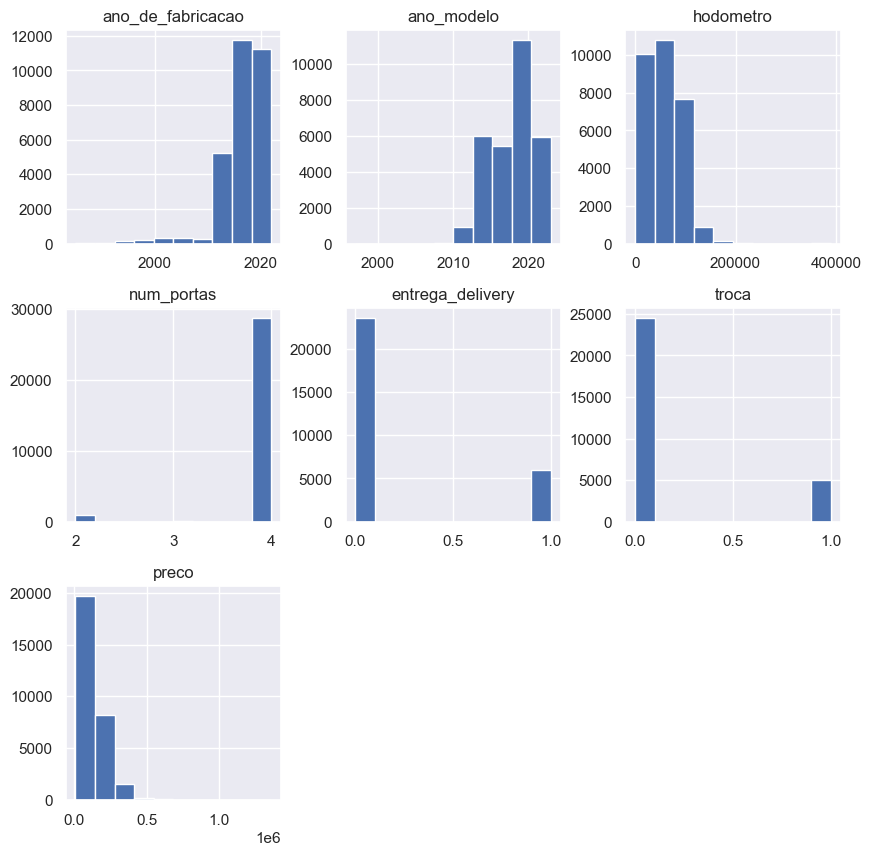

In [52]:
df_treino.hist(figsize=(10, 10));

## Extraindo algumas informações da coluna `versao`

In [53]:
df_treino['versao'].head(15)

0                       1.6 16V FLEXSTART SL 4P XTRONIC
1                       2.0 16V FLEX LIMITED AUTOMÁTICO
2                 2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO
3     2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...
4            2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO
5                   1.0 COMFORT PLUS 12V FLEX 4P MANUAL
6                             2.0 16V FLEXONE EX 4P CVT
7                         1.5 LX 16V FLEX 4P AUTOMÁTICO
8                    1.0 TSI HIGH UP 12V FLEX 4P MANUAL
9          2.7 SRV 7 LUGARES 4X2 16V FLEX 4P AUTOMÁTICO
10                      1.8 SE-G 16V FLEX 4P AUTOMÁTICO
11                           2.0 4X4 16V FLEX 4P MANUAL
12       2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC
13                      2.0 16V FLEX LIMITED AUTOMÁTICO
14       2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC
Name: versao, dtype: object

Os primeiros caracteres da coluna `versao` se referem ao motor do veículo

In [54]:
motor_treino = [item[:3] for item in df_treino['versao']]


df_treino['motor'] = motor_treino
df_treino['motor'].unique()

array(['1.6', '2.0', '2.4', '1.0', '1.5', '2.7', '1.8', '1.2', '1.4',
       '3.0', '3.2', '3.5', '1.3', '4.4', '2.2', '2.8', '2.3', '2.5',
       '2.1', '4.2', '3.8', '3.6', 'EV ', '6.7', 'B12', '3.3', '5.0',
       '6.2', '2.9', '4.0', '1.9', '3.7', '1.7', '4.8', '4.9', 'P8 ',
       'Z.E', '0.6', '4S ', 'ELÉ', '5.5', '4.1', '3.9', '90 ', '4.3',
       '4.6', '5.2', '5.7', '4.5', 'TUR', 'BEV', '4.7', '5.9'],
      dtype=object)

In [55]:
motor = [
    'outros'
    if item in ["B12", "4S ", "ELÉ", "Z.E", "EV ", "TUR", "P8 ", "90 ", "BEV"]
    else item
    for item in df_treino["motor"]
]

df_treino['motor'] = motor

In [56]:
df_treino['motor'] = pd.Categorical(df_treino['motor'])
df_treino['motor'].unique()

['1.6', '2.0', '2.4', '1.0', '1.5', ..., '5.2', '5.7', '4.5', '4.7', '5.9']
Length: 45
Categories (45, object): ['0.6', '1.0', '1.2', '1.3', ..., '5.9', '6.2', '6.7', 'outros']

In [57]:
#transformando o conjunto teste
motor_teste = [item[:3] for item in df_teste['versao']]


df_teste['motor'] = motor_teste
df_teste['motor'].unique()

array(['1.6', '1.4', '2.0', '1.5', '1.8', '2.8', '3.2', '6.2', '5.0',
       '1.0', '3.0', '2.1', '4.0', '2.5', '2.4', '4.6', '3.3', '3.6',
       '6.7', '1.3', '2.9', '2.2', '5.5', '2.7', '2.3', 'B12', '4.2',
       '3.8', '3.5', '90 ', '4.4', '3.7', '4.5', 'EV ', '4.3', '5.7',
       '1.7', '4S ', '4.7', '6.3', 'BEV', 'ELÉ', '4.8', '5.2', '5.9',
       '1.2', '1.1', '3.9', '0.6', '4.1'], dtype=object)

In [58]:
motor = [
    'outros'
    if item in ["B12", "4S ", "ELÉ", "Z.E", "EV ", "TUR", "P8 ", "90 ", "BEV"]
    else item
    for item in df_teste["motor"]
]

In [59]:
df_teste['motor'] = motor
df_teste['motor'].unique()

array(['1.6', '1.4', '2.0', '1.5', '1.8', '2.8', '3.2', '6.2', '5.0',
       '1.0', '3.0', '2.1', '4.0', '2.5', '2.4', '4.6', '3.3', '3.6',
       '6.7', '1.3', '2.9', '2.2', '5.5', '2.7', '2.3', 'outros', '4.2',
       '3.8', '3.5', '4.4', '3.7', '4.5', '4.3', '5.7', '1.7', '4.7',
       '6.3', '4.8', '5.2', '5.9', '1.2', '1.1', '3.9', '0.6', '4.1'],
      dtype=object)

Extraindo o tipo de combustível

In [60]:
def tipo_combustivel(df):
    combustivel = []
    for item in df['versao']:
        if "FLEXSTART" in item:
            combustivel.append("FLEXSTART")
        elif "FLEX" in item:
            combustivel.append("FLEX")
        elif "GASOLINA" in item:
            combustivel.append("GASOLINA")
        elif "DIESEL" in item:
            combustivel.append("DIESEL")
        elif "FLEXONE" in item:
            combustivel.append("FLEXONE")
        elif "GASOLINA" in item:
            combustivel.append("GASOLINA")
        elif "HÍBRIDO" in item:
            combustivel.append("HIBRIDO")
        elif "HYBRID" in item:
            combustivel.append("HIBRIDO")
        elif "ELÉTRICO" in item:
            combustivel.append("ELETRICO")
        elif "ELECTRIC" in item:
            combustivel.append("ELETRICO")
        else:
            combustivel.append('outros')
    df['combustivel'] = combustivel
    return df

In [61]:
tipo_combustivel(df_treino)
tipo_combustivel(df_teste)

,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,motor,combustivel
0,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021.0,20258.0,Manual,4,Hatchback,N,Branco,PF,SP,Pessoa Física,0,0,1.6,FLEXSTART
1,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021.0,53045.0,Manual,2,Picape,N,Branco,PJ,AM,Loja,0,0,1.4,FLEX
2,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019.0,32486.0,Automática,4,Utilitário esportivo,N,Branco,PF,GO,Pessoa Física,0,0,2.0,GASOLINA
3,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020.0,24937.0,Automática,4,Sedã,N,Cinza,PJ,SP,Loja,0,0,1.4,FLEX
4,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019.0,62074.0,Automática,4,Sedã,N,Branco,PJ,SP,Loja,0,0,1.5,FLEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,TOYOTA,COROLLA,1.8 GLI UPPER 16V FLEX 4P AUTOMÁTICO,2017,2018.0,44943.0,CVT,4,Sedã,N,Preto,PF,SP,Pessoa Física,0,0,1.8,FLEX
9858,TOYOTA,HILUX,2.8 SRV 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2017,2017.0,44316.0,Automática,4,Picape,N,Branco,PJ,RJ,Loja,0,0,2.8,DIESEL
9859,CHEVROLET,TRACKER,1.0 TURBO FLEX LT AUTOMÁTICO,2020,2021.0,21587.0,Automática,4,Sedã,N,Branco,PF,PR,Pessoa Física,0,0,1.0,FLEX
9860,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2018,2018.0,54084.0,Automática,4,Sedã,N,Prata,PJ,SP,Loja,0,0,1.6,FLEX


In [62]:
df_treino[df_treino['combustivel']=='outros'].describe(exclude=['float64','int64']).T

,count,unique,top,freq
marca,816,7,VOLKSWAGEN,781
modelo,816,9,POLO,463
versao,816,16,1.0 200 TSI COMFORTLINE AUTOMÁTICO,466
cambio,816,2,Automática,809
tipo,816,5,Hatchback,420
blindado,816,2,N,815
cor,816,4,Branco,749
tipo_vendedor,816,2,PF,414
estado_vendedor,816,16,SP,432
anunciante,816,3,Pessoa Física,416


In [63]:
df_treino['combustivel'].unique()

array(['FLEXSTART', 'FLEX', 'GASOLINA', 'DIESEL', 'outros', 'HIBRIDO',
       'ELETRICO'], dtype=object)

In [64]:
#Checando se algum valor faltante foi inserido durante as codificações
total_na_treino = df_treino.isna().sum()
porcentagem_na_treino = (total_na_treino / len(df_treino)) * 100
print(porcentagem_na_treino.round(4))

marca                0.0
modelo               0.0
versao               0.0
ano_de_fabricacao    0.0
ano_modelo           0.0
hodometro            0.0
cambio               0.0
num_portas           0.0
tipo                 0.0
blindado             0.0
cor                  0.0
tipo_vendedor        0.0
estado_vendedor      0.0
anunciante           0.0
entrega_delivery     0.0
troca                0.0
preco                0.0
motor                0.0
combustivel          0.0
dtype: float64


In [65]:
#Checando se algum valor faltante foi inserido durante as codificações
total_na_teste = df_teste.isna().sum()
porcentagem_na_teste =( total_na_teste / len(df_teste)) * 100
print(porcentagem_na_teste.round(4))

marca                0.0
modelo               0.0
versao               0.0
ano_de_fabricacao    0.0
ano_modelo           0.0
hodometro            0.0
cambio               0.0
num_portas           0.0
tipo                 0.0
blindado             0.0
cor                  0.0
tipo_vendedor        0.0
estado_vendedor      0.0
anunciante           0.0
entrega_delivery     0.0
troca                0.0
motor                0.0
combustivel          0.0
dtype: float64


In [66]:
df_treino[['versao','modelo']].describe().T

,count,unique,top,freq
versao,29584,1916,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,1352
modelo,29584,457,COMPASS,1480


_________________________

## Etapa auxiliar de criação de tabela para os preços médios de cada versão e ano de veículo

In [67]:
df_treino['veiculo'] = df_treino['marca']+ ' ' + df_treino['versao']+ ' ' + df_treino['ano_de_fabricacao'].astype(str)+ ' ' + df_treino['tipo']

In [68]:
tabela_precos = df_treino[['veiculo','preco']]

In [69]:
tabela_precos.head()

,veiculo,preco
0,NISSAN 1.6 16V FLEXSTART SL 4P XTRONIC 2017 Sedã,74732.590084
1,JEEP 2.0 16V FLEX LIMITED AUTOMÁTICO 2017 Sedã,81965.332634
2,KIA 2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO 2018...,162824.814472
3,VOLKSWAGEN 2.0 HIGHLINE 4X4 CD 16V TURBO INTER...,123681.358857
4,SSANGYONG 2.0 GLS 4X4 16V TURBO DIESEL 4P AUTO...,82419.763891


In [70]:
tabela_precos_medios = tabela_precos.groupby('veiculo')['preco'].mean().reset_index()
tabela_precos_medios.head()

,veiculo,preco
0,ALFA ROMEO 2.0 16V GASOLINA 4P AUTOMÁTICO 1999...,74656.270641
1,ALFA ROMEO 2.0 16V GASOLINA 4P AUTOMÁTICO 2001...,65218.016076
2,ALFA ROMEO 2.0 16V GASOLINA 4P AUTOMÁTICO 2001...,79559.596289
3,ALFA ROMEO 2.0 16V GASOLINA 4P AUTOMÁTICO 2007...,65265.917867
4,ALFA ROMEO 2.0 16V GASOLINA 4P AUTOMÁTICO 2009...,71651.981833


In [71]:
df_teste['veiculo'] = df_teste['marca']+ ' ' + df_teste['versao']+ ' ' + df_teste['ano_de_fabricacao'].astype(str)+ ' ' + df_teste['tipo']

In [72]:
tabela_veiculos_sem_precos = df_teste['veiculo']

In [73]:
tabela_veiculos_sem_precos.head()

0    NISSAN 1.6 16V FLEXSTART V-DRIVE MANUAL 2021 H...
1    FIAT 1.4 MPI WORKING CS 8V FLEX 2P MANUAL 2021...
2    AUDI 2.0 TFSI GASOLINA BLACK S TRONIC 2018 Uti...
3    CHEVROLET 1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO ...
4         FORD 1.5 TI-VCT FLEX SE AUTOMÁTICO 2019 Sedã
Name: veiculo, dtype: object

_________________________

* `ano_de_fabricacao` e `ano_modelo` em relação ao ano atual

In [74]:
 # Definir ano atual
ano_atual = 2023

# Calcular idade dos carros
df_treino['idade_fabricacao'] = (ano_atual - df_treino['ano_de_fabricacao']).astype(int)
df_treino['idade_modelo'] = (ano_atual - df_treino['ano_modelo']).astype(int)
df_teste['idade_fabricacao'] = (ano_atual - df_teste['ano_de_fabricacao']).astype(int)
df_teste['idade_modelo'] = (ano_atual - df_teste['ano_modelo']).astype(int)

# Remover colunas desnecessárias
df_treino = df_treino.drop(['ano_de_fabricacao', 'ano_modelo'], axis=1)
df_teste = df_teste.drop(['ano_de_fabricacao', 'ano_modelo'], axis=1)

***PREMISSA:***
Considerando efeitos de explosão combinatória e dimensional, as colunas `versao` e `modelo`serão descartadas, a análise levará em conta características do veículo e não seu nome.

In [75]:
df_treino.drop(['versao','modelo','veiculo'], axis=1, inplace=True)
df_teste.drop(['versao','modelo','veiculo'], axis=1, inplace=True)

In [76]:
def regiao(df):
    estados_centro_oeste_norte = ['AC', 'AL', 'AP', 'AM', 'DF', 'GO', 'MA', 'MT', 'MS', 'PA', 'RO', 'RR', 'TO']
    estados_nordeste = ['BA', 'CE', 'PB', 'PE', 'PI', 'RN', 'SE']
    estados_rj_es = ['ES', 'RJ']
    estados_sul = ['PR', 'RS', 'SC']

    regiao = []
    for estado in df['estado_vendedor']:
        if estado in estados_centro_oeste_norte:
            regiao.append('CO_NO')
        elif estado in estados_nordeste:
            regiao.append('NORDESTE')
        elif estado in estados_rj_es:
            regiao.append('RJ_ES')
        elif estado == 'SP':
            regiao.append('SP')
        elif estado == 'MG':
            regiao.append('MG')
        elif estado in estados_sul:
            regiao.append('SUL')
        else:
            regiao.append('erro')

    df['regiao'] = regiao
    return df



regiao(df_treino)
regiao(df_teste)

,marca,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,motor,combustivel,idade_fabricacao,idade_modelo,regiao
0,NISSAN,20258.0,Manual,4,Hatchback,N,Branco,PF,SP,Pessoa Física,0,0,1.6,FLEXSTART,2,2,SP
1,FIAT,53045.0,Manual,2,Picape,N,Branco,PJ,AM,Loja,0,0,1.4,FLEX,2,2,CO_NO
2,AUDI,32486.0,Automática,4,Utilitário esportivo,N,Branco,PF,GO,Pessoa Física,0,0,2.0,GASOLINA,5,4,CO_NO
3,CHEVROLET,24937.0,Automática,4,Sedã,N,Cinza,PJ,SP,Loja,0,0,1.4,FLEX,4,3,SP
4,FORD,62074.0,Automática,4,Sedã,N,Branco,PJ,SP,Loja,0,0,1.5,FLEX,4,4,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,TOYOTA,44943.0,CVT,4,Sedã,N,Preto,PF,SP,Pessoa Física,0,0,1.8,FLEX,6,5,SP
9858,TOYOTA,44316.0,Automática,4,Picape,N,Branco,PJ,RJ,Loja,0,0,2.8,DIESEL,6,6,RJ_ES
9859,CHEVROLET,21587.0,Automática,4,Sedã,N,Branco,PF,PR,Pessoa Física,0,0,1.0,FLEX,3,2,SUL
9860,PEUGEOT,54084.0,Automática,4,Sedã,N,Prata,PJ,SP,Loja,0,0,1.6,FLEX,5,5,SP


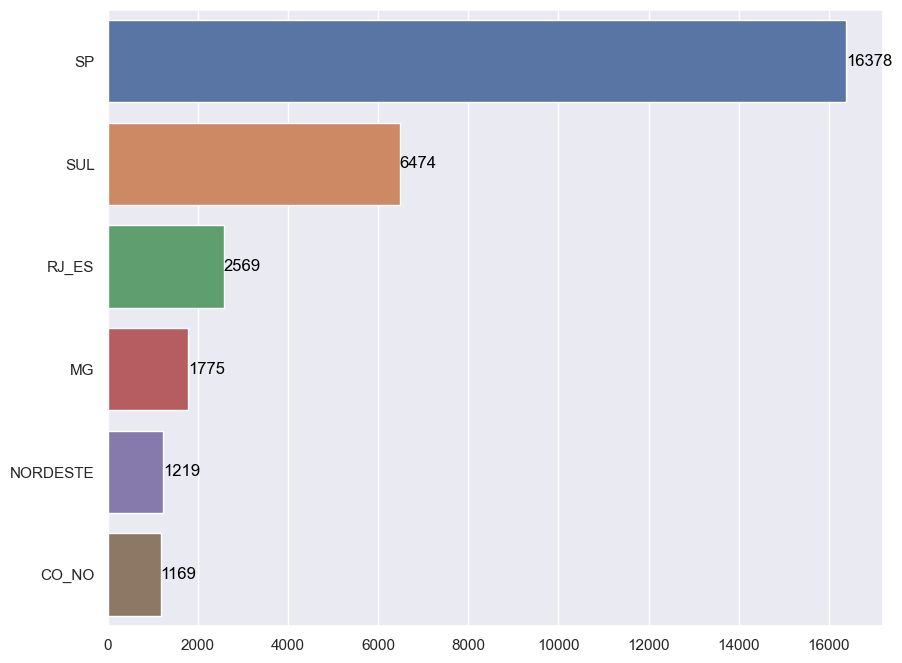

In [77]:
plot_barras_horizontais('regiao', df_treino)

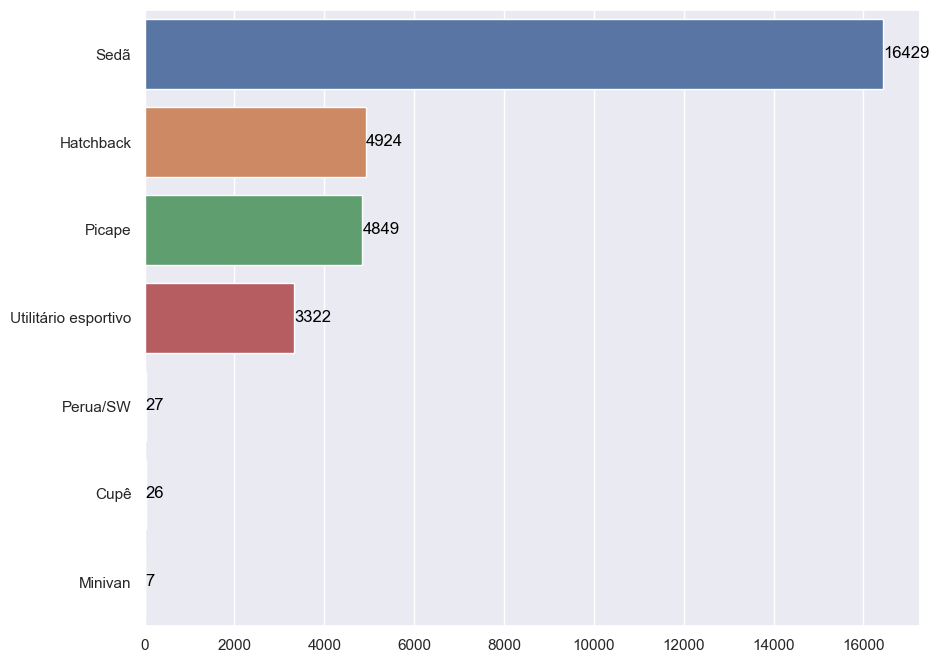

In [78]:
plot_barras_horizontais('tipo', df_treino)

In [79]:
df_treino['num_portas'].value_counts()

4    28697
2      868
3       19
Name: num_portas, dtype: int64

In [80]:
df_treino[df_treino['num_portas']=='3']

,marca,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,preco,motor,combustivel,idade_fabricacao,idade_modelo,regiao


In [81]:
df_teste['num_portas'].value_counts()

4    9577
2     282
3       3
Name: num_portas, dtype: int64

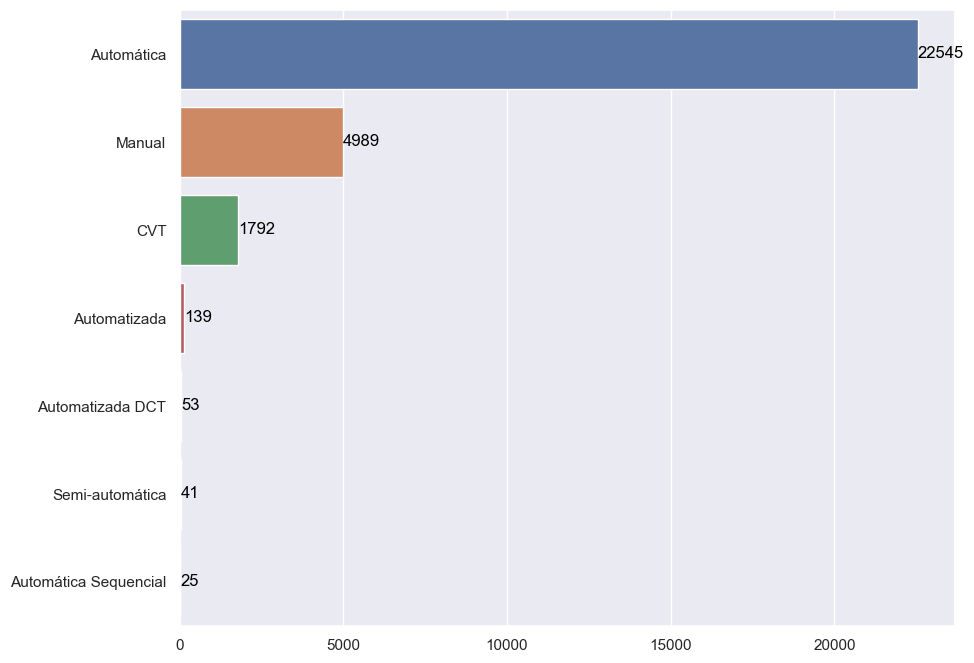

In [82]:
plot_barras_horizontais('cambio', df_treino)

In [83]:
df_treino['cambio'].value_counts()

Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
Name: cambio, dtype: int64

In [84]:
df_treino['cambio'].value_counts().idxmin()

'Automática Sequencial'

In [85]:
def plot_dist_box_plots(dataframe, coluna):
    plt.figure(figsize=(18, 6))

    # subplot com o plot de densidade da distribuição
    plt.subplot(1, 2, 1)
    sns.histplot(dataframe[coluna], kde=True, stat="density")

    # subplot com o boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(dataframe[coluna])

    plt.show()

In [86]:
df_treino['hodometro'].describe().round().T

count     29584.0
mean      58431.0
std       32562.0
min         100.0
25%       31214.0
50%       57434.0
75%       81954.0
max      390065.0
Name: hodometro, dtype: float64

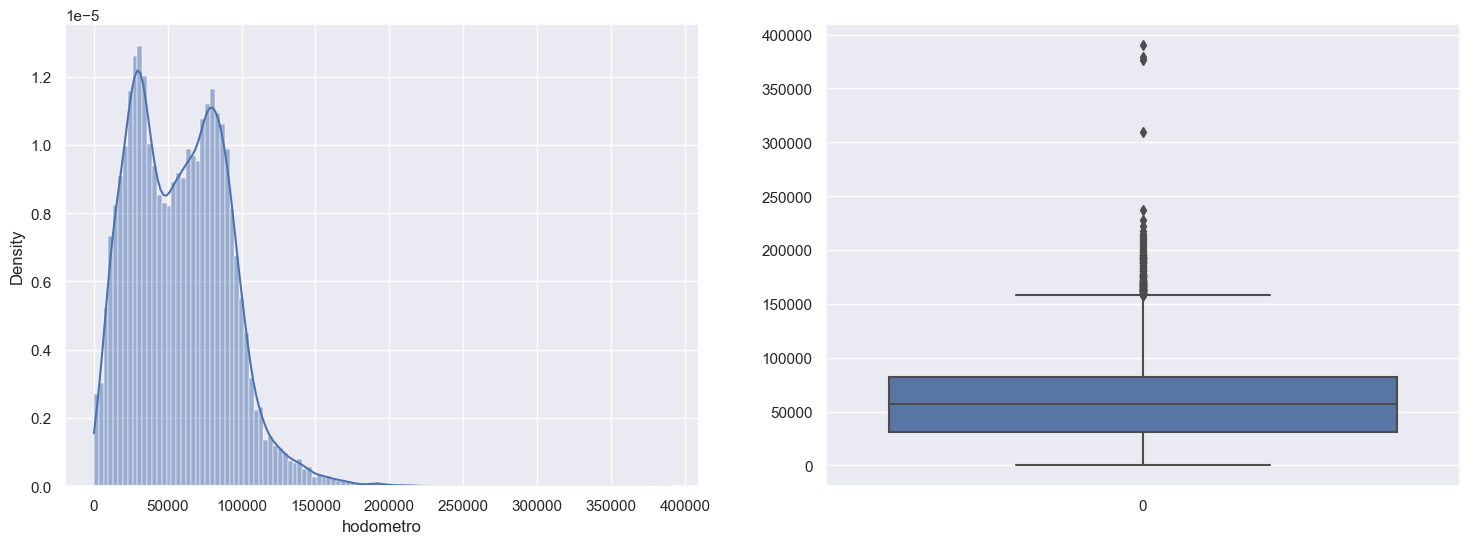

In [87]:
plot_dist_box_plots(df_treino, 'hodometro')

In [88]:
df_treino[df_treino['hodometro']>160000].shape[0]

141

Aparando a distribuição, eliminando os valores acima do 99,5 percentil

In [89]:
df_treino[df_treino['hodometro'] > df_treino['hodometro'].quantile(.995)].shape[0]

148

In [90]:
df_treino = df_treino[
    (df_treino['hodometro'] < df_treino['hodometro'].quantile(.995))
]

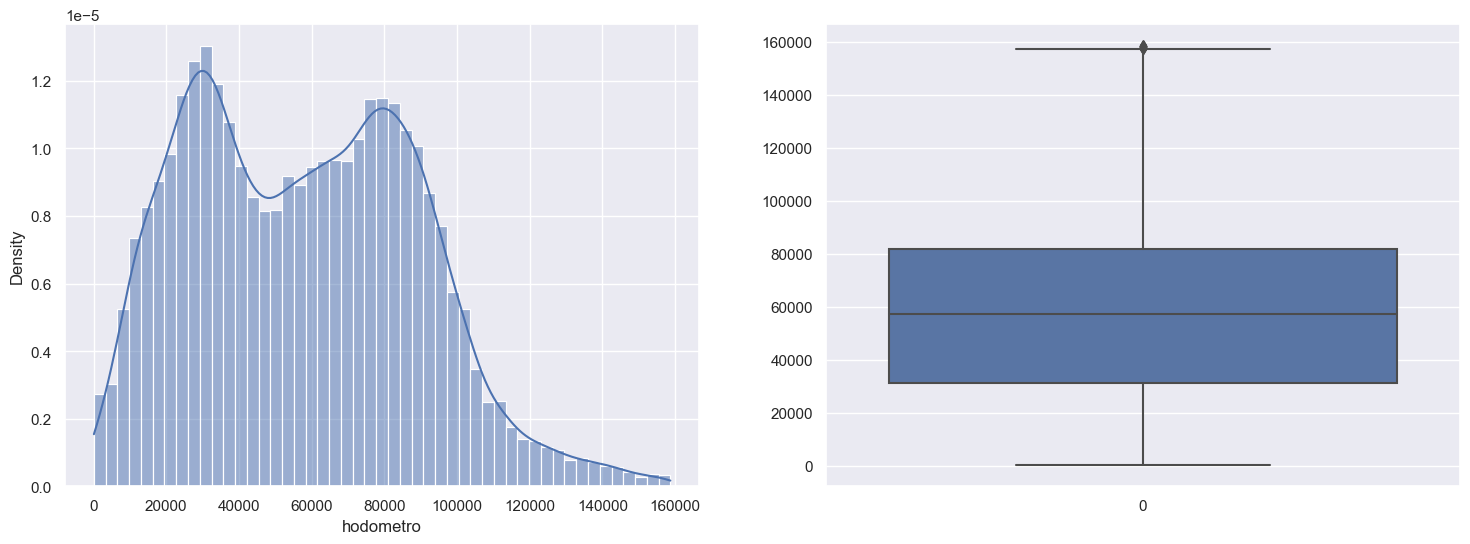

In [91]:
plot_dist_box_plots(df_treino, 'hodometro')

In [92]:
df_treino.shape[0]

29436

In [93]:
df_treino['preco'].describe().round()

count      29436.0
mean      133436.0
std        81635.0
min        11606.0
25%        76985.0
50%       114700.0
75%       164009.0
max      1359813.0
Name: preco, dtype: float64

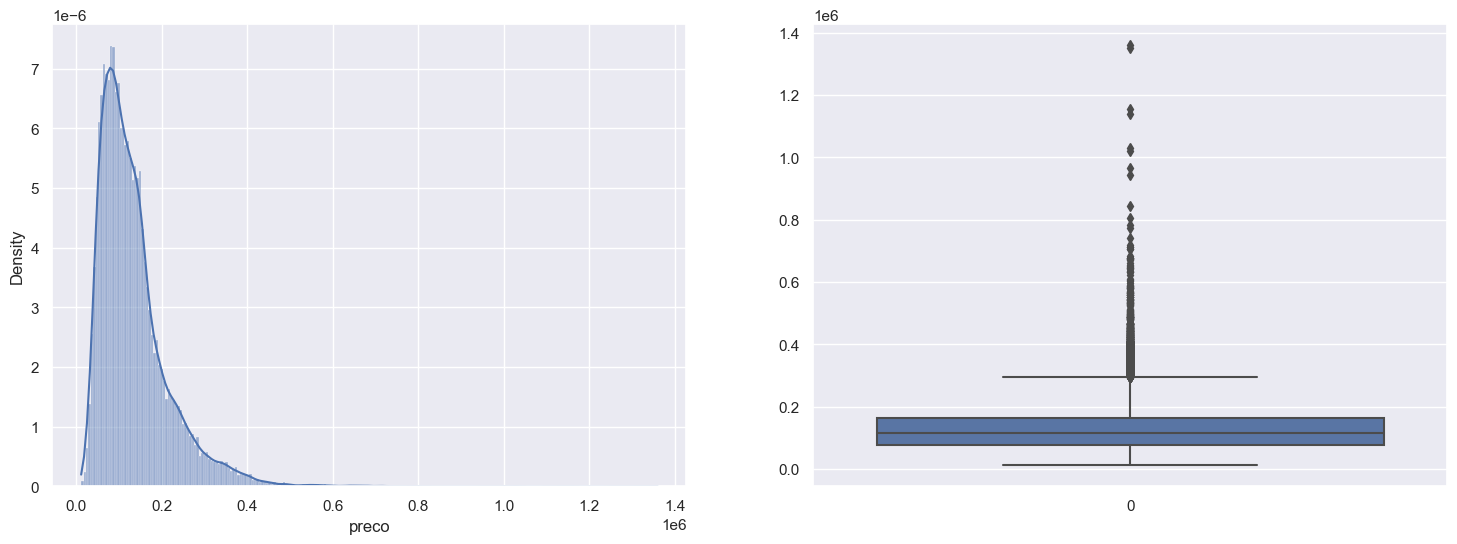

In [94]:
plot_dist_box_plots(df_treino, 'preco')

In [95]:
df_treino[df_treino['preco']>450000].shape[0]

154

In [96]:
df_treino[df_treino['preco'] > df_treino['preco'].quantile(.995)].shape[0]

148

Aparando a distribuição, eliminando os valores acima do percentil 99

In [97]:
df_treino = df_treino[
    (df_treino['preco'] < df_treino['preco'].quantile(.99))
]

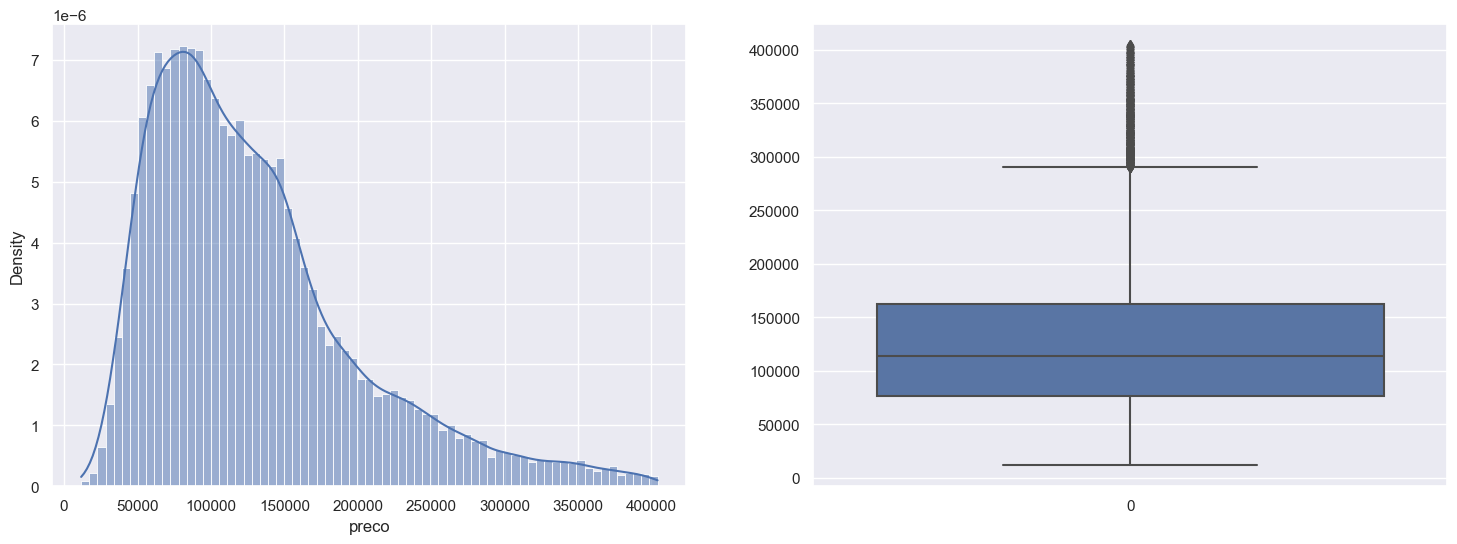

In [98]:
plot_dist_box_plots(df_treino, 'preco')

In [99]:
df_treino['preco'].describe().round()

count     29141.0
mean     129716.0
std       71858.0
min       11606.0
25%       76636.0
50%      113930.0
75%      162026.0
max      404233.0
Name: preco, dtype: float64

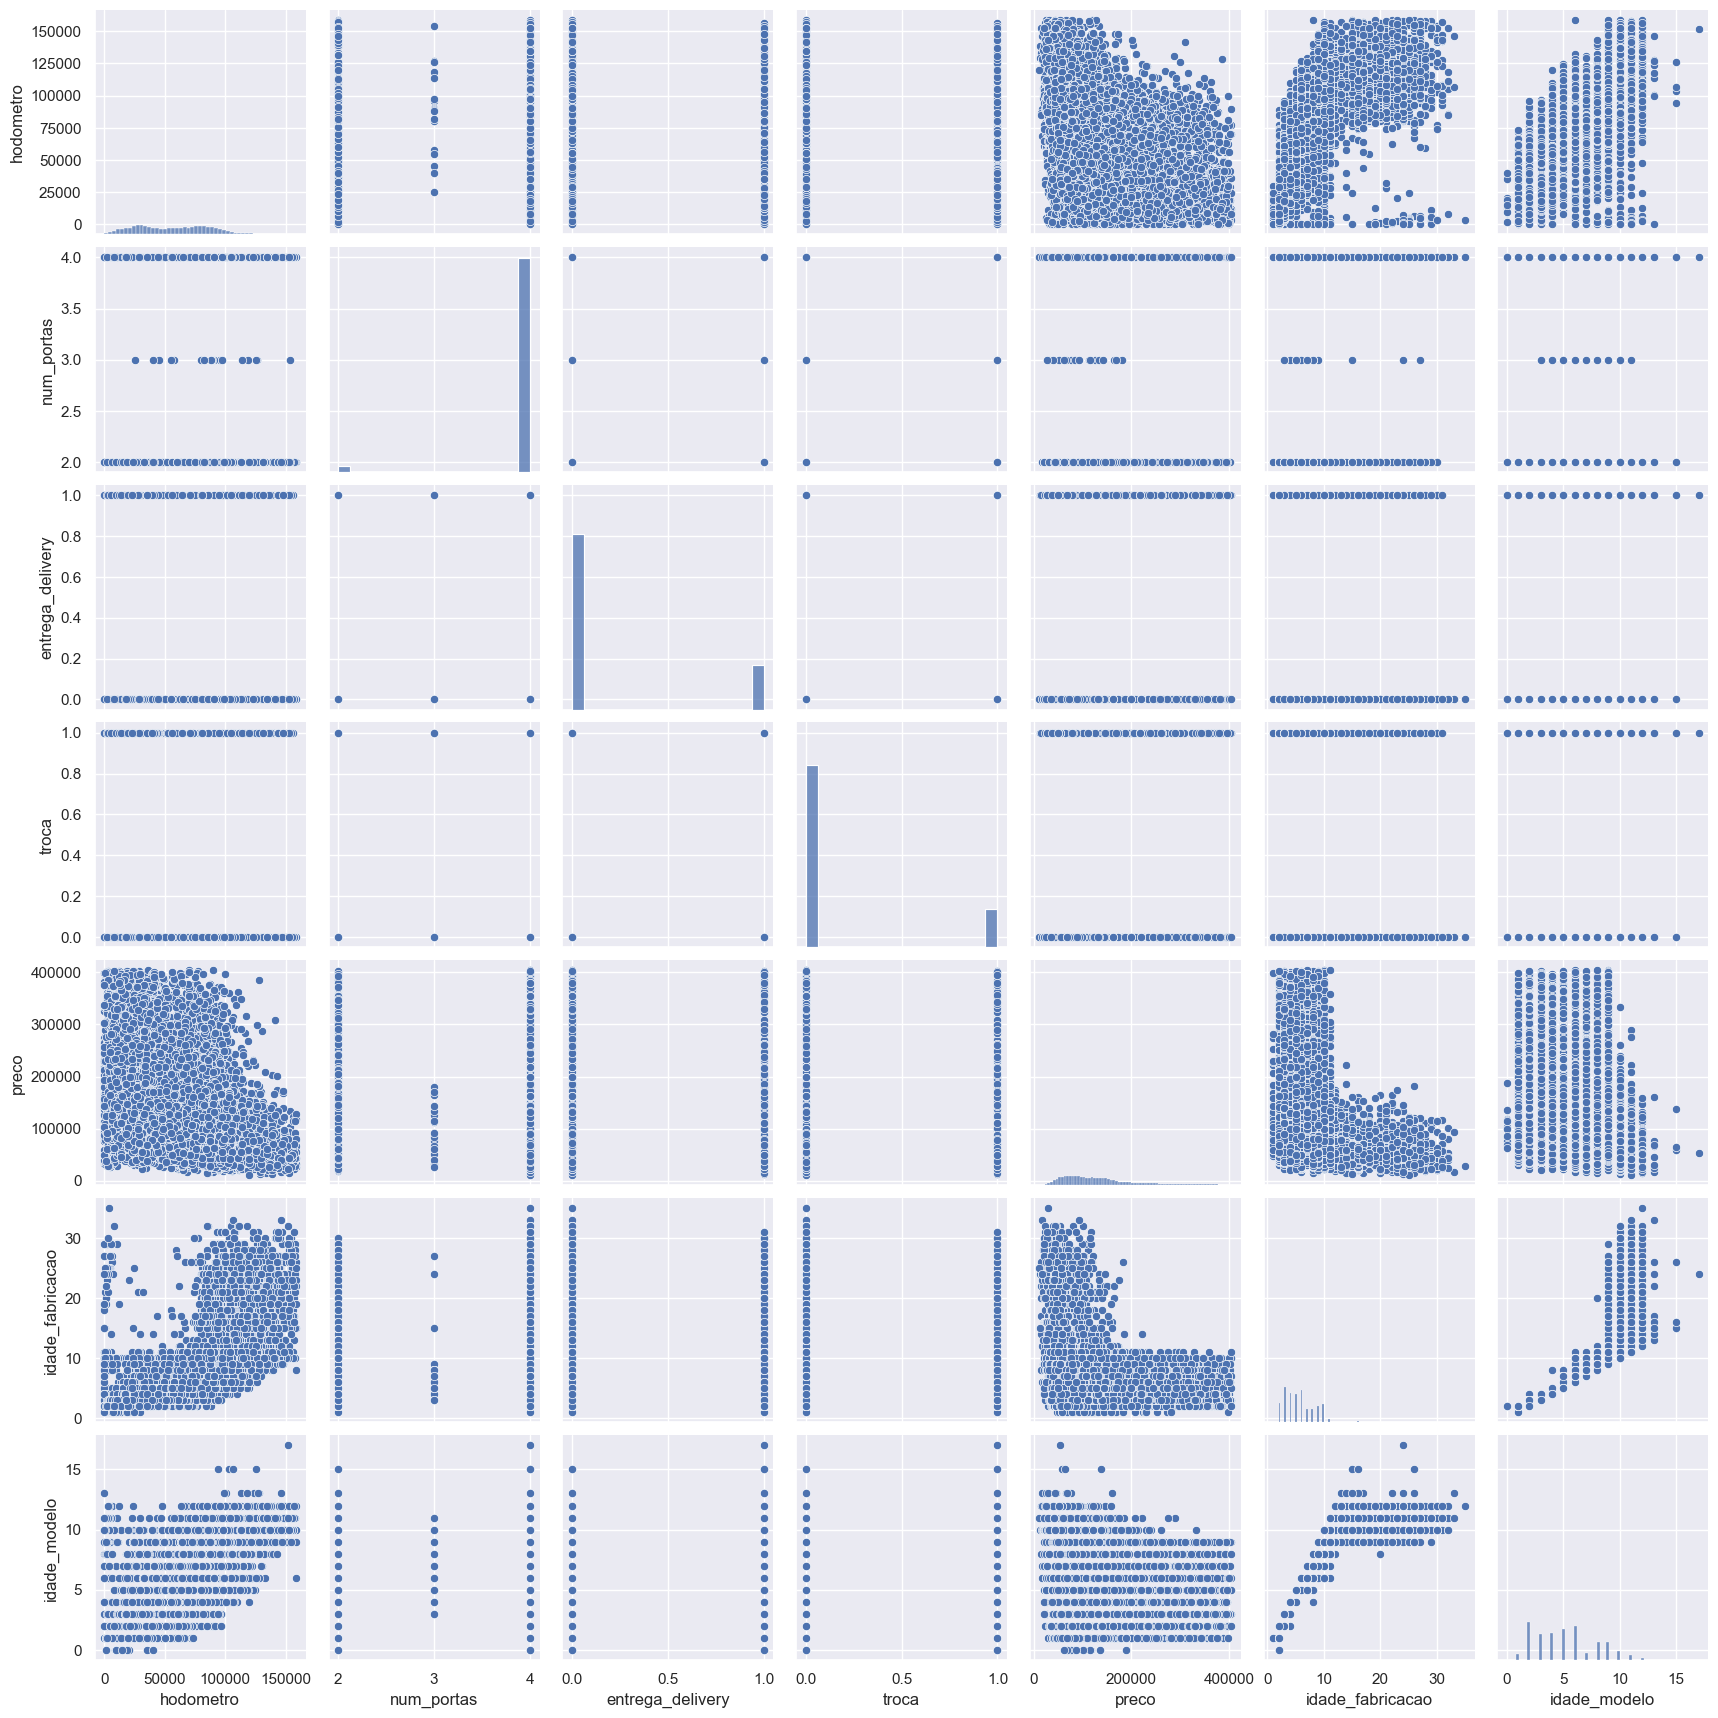

In [100]:
sns.pairplot(df_treino);

C:\Users\Raphael\AppData\Local\Temp\ipykernel_10292\3797833105.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_treino.corr(),


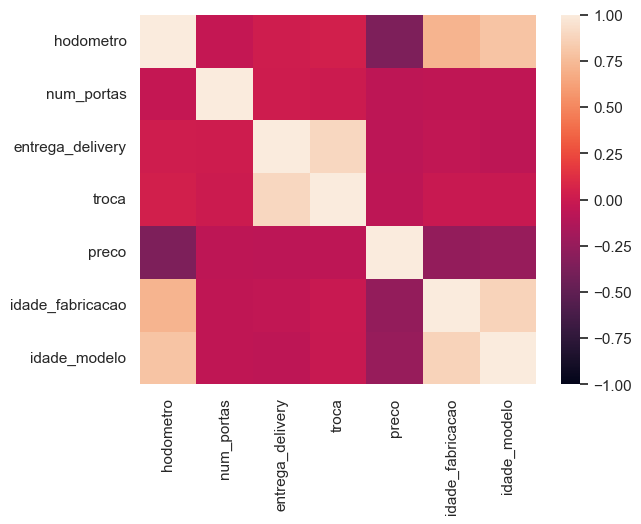

In [101]:
sns.set_palette('coolwarm')

sns.heatmap(df_treino.corr(),
            vmin=-1,
            vmax=1,
            annot=False);

Há correlação forte entre o ano de fabricação a kilometragem

In [102]:
df_treino.corr().round(2)

C:\Users\Raphael\AppData\Local\Temp\ipykernel_10292\2210189149.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_treino.corr().round(2)


,hodometro,num_portas,entrega_delivery,troca,preco,idade_fabricacao,idade_modelo
hodometro,1.00,-0.03,0.02,0.04,-0.36,0.71,0.80
num_portas,-0.03,1.00,0.01,0.01,-0.06,-0.06,-0.06
entrega_delivery,0.02,0.01,1.00,0.89,-0.08,-0.05,-0.06
troca,0.04,0.01,0.89,1.00,-0.06,-0.01,-0.02
preco,-0.36,-0.06,-0.08,-0.06,1.00,-0.26,-0.24
idade_fabricacao,0.71,-0.06,-0.05,-0.01,-0.26,1.00,0.87
idade_modelo,0.80,-0.06,-0.06,-0.02,-0.24,0.87,1.00


## Exploração em função do preço

In [103]:
def plotar_boxplots(df, colunas, target):
    num_plots = len(colunas)
    num_linhas = num_plots // 2 + (num_plots % 2 > 0)  # Calcula o número de linhas dos subplots

    fig, axes = plt.subplots(num_linhas, 2, figsize=(20, 15))  # Cria a figura e os eixos dos subplots

    for i, coluna in enumerate(colunas):
        linha = i // 2  # Determina a linha atual do subplot
        coluna_subplot = i % 2  # Determina a coluna atual do subplot
        ax = axes[linha, coluna_subplot]  # Obtém o eixo do subplot atual
        sns.boxplot(x=coluna, y=target, data=df, ax=ax)  # Plota o boxplot na posição atual

    plt.tight_layout()  # Ajusta o espaçamento entre os subplots
    plt.show()  # Mostra o gráfico

In [104]:
df_treino.columns

Index(['marca', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor',
       'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca', 'preco', 'motor',
       'combustivel', 'idade_fabricacao', 'idade_modelo', 'regiao'],
      dtype='object')

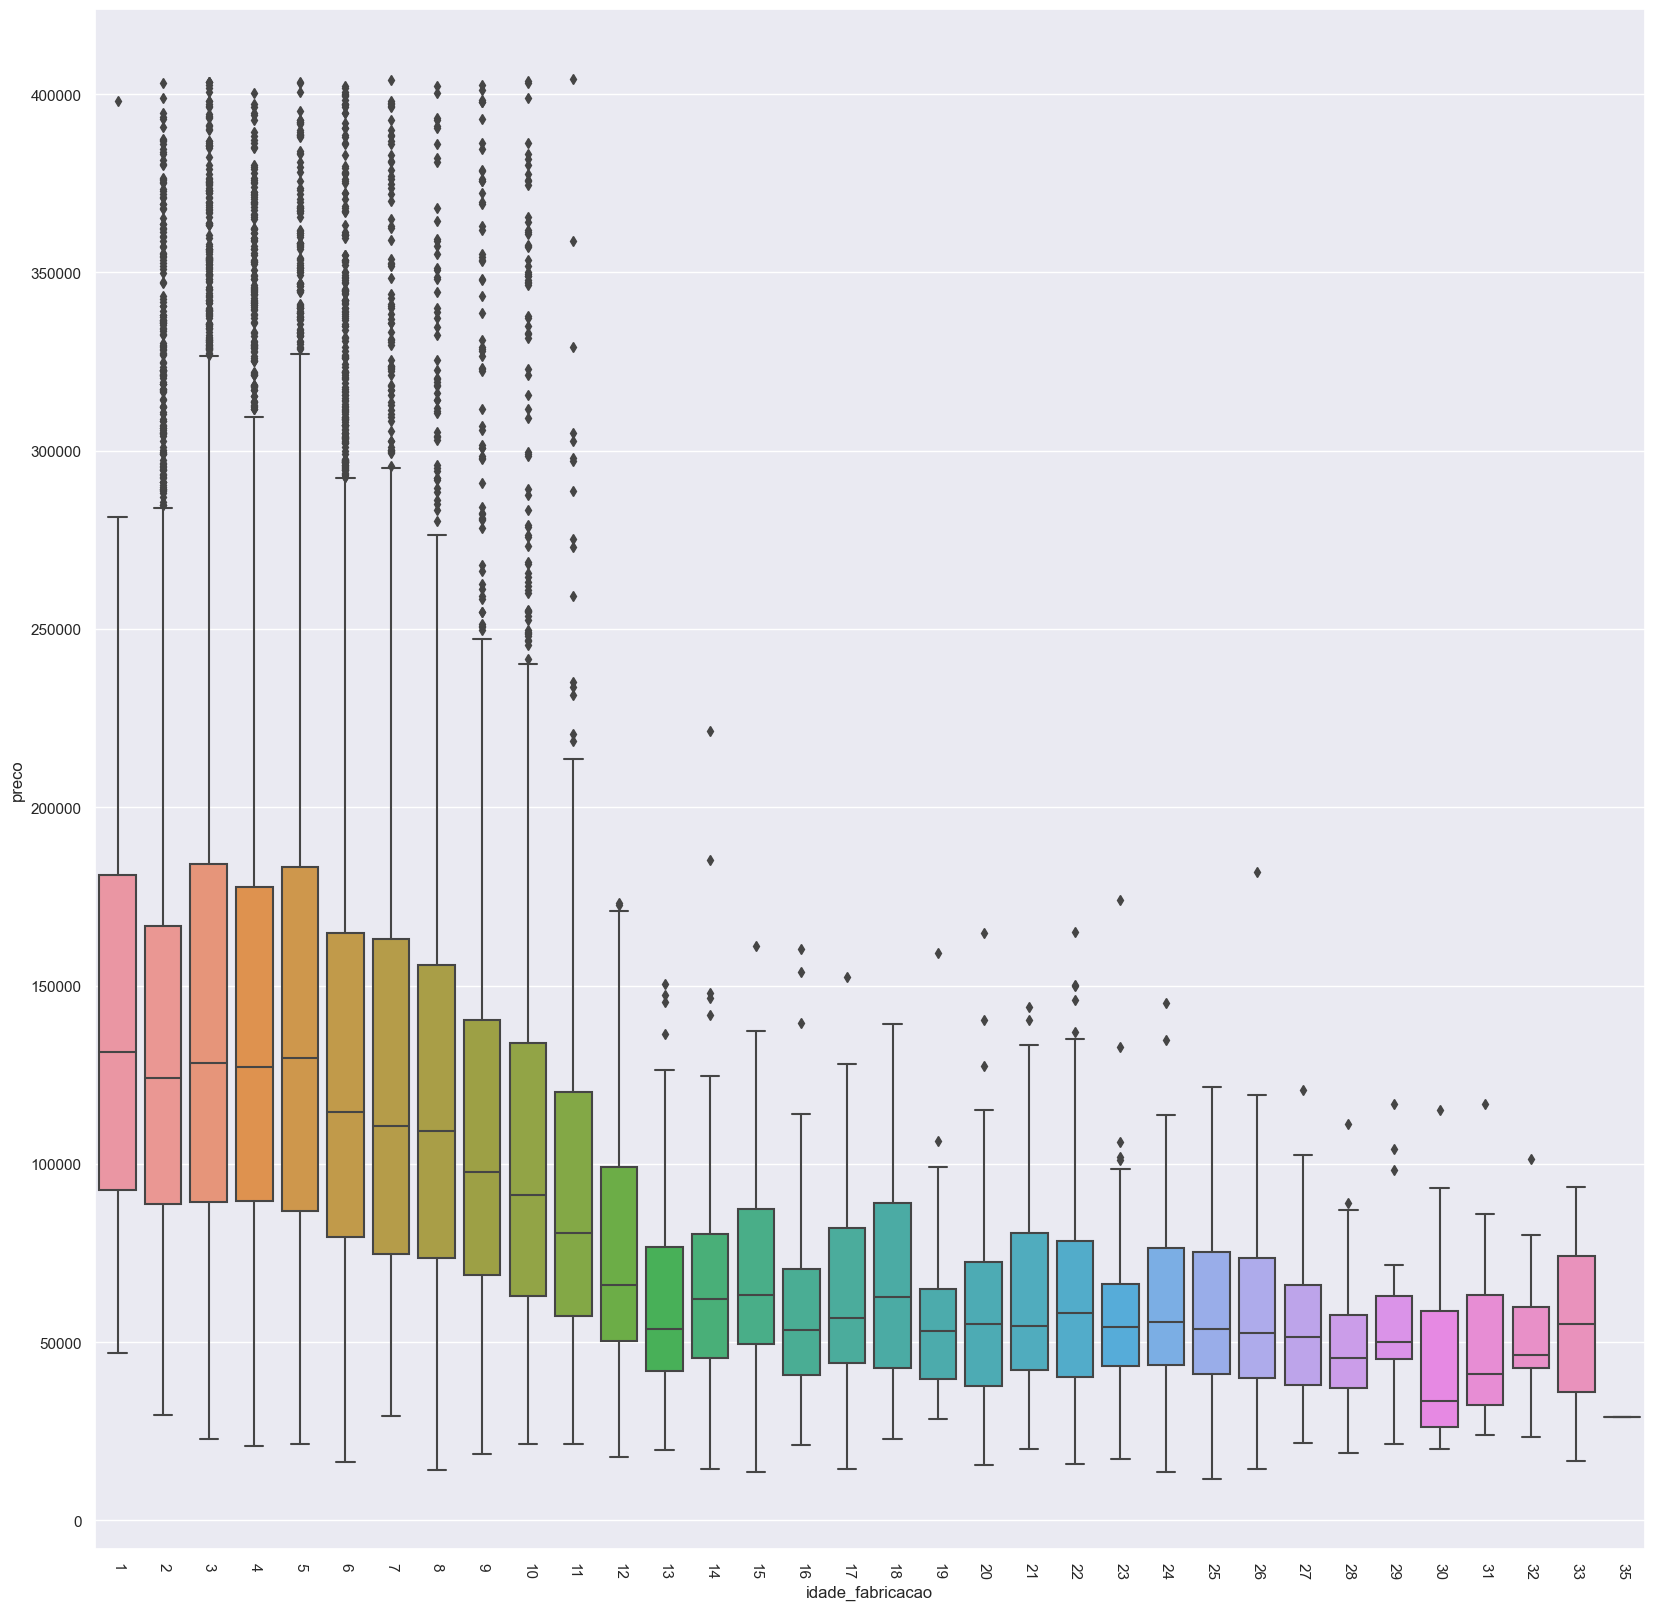

In [105]:
# Increase the figure size
plt.figure(figsize=(20, 20))

# Create a boxplot
sns.boxplot(x = 'idade_fabricacao', y = 'preco', data = df_treino)

# Rotate the x-axis labels
plt.xticks(rotation=-90)

# Show the plot
plt.show()

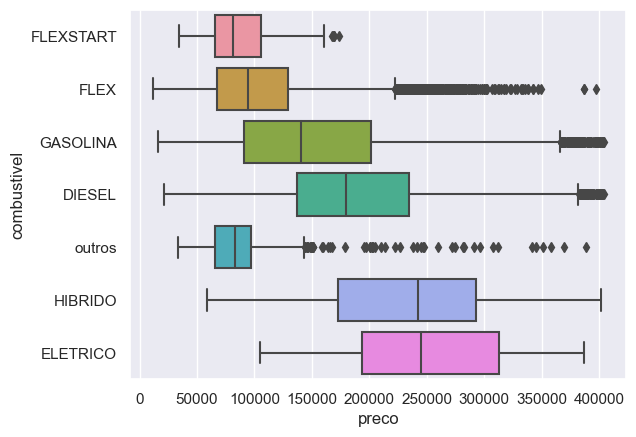

In [106]:
sns.boxplot(y = 'combustivel', x = 'preco', data = df_treino);

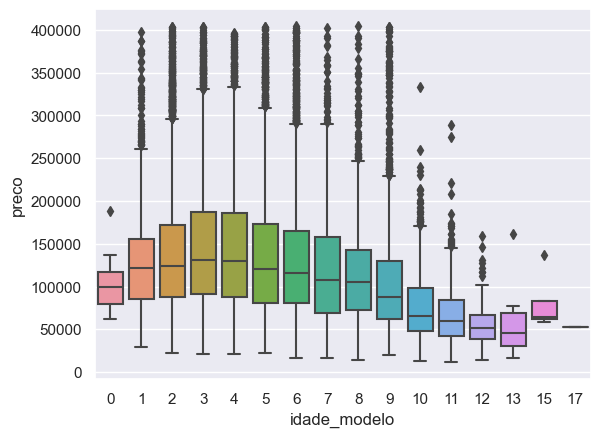

In [107]:
sns.boxplot(x = 'idade_modelo', y = 'preco', data = df_treino);

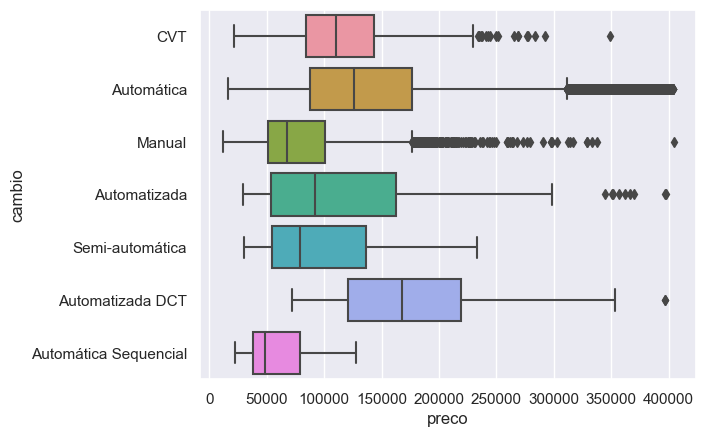

In [108]:
sns.boxplot(y = 'cambio', x = 'preco', data = df_treino);

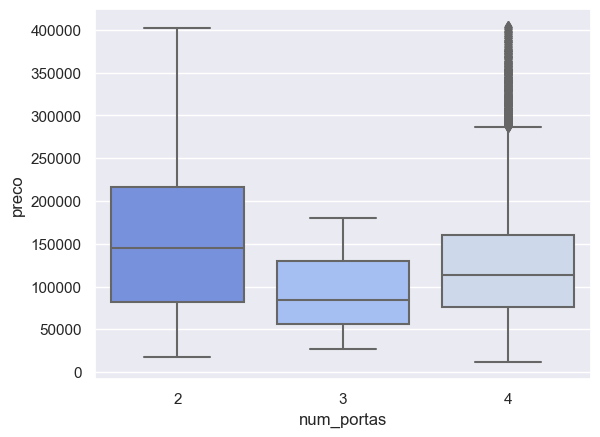

In [109]:
sns.boxplot(x = 'num_portas', y = 'preco', data = df_treino);

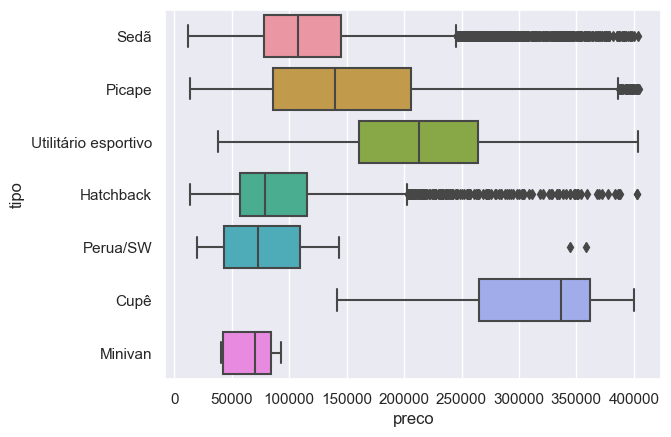

In [110]:
sns.boxplot(y = 'tipo', x = 'preco', data = df_treino);

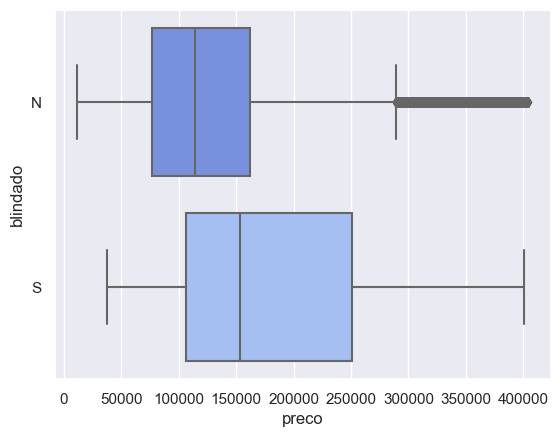

In [111]:
sns.boxplot(y = 'blindado', x = 'preco', data = df_treino);

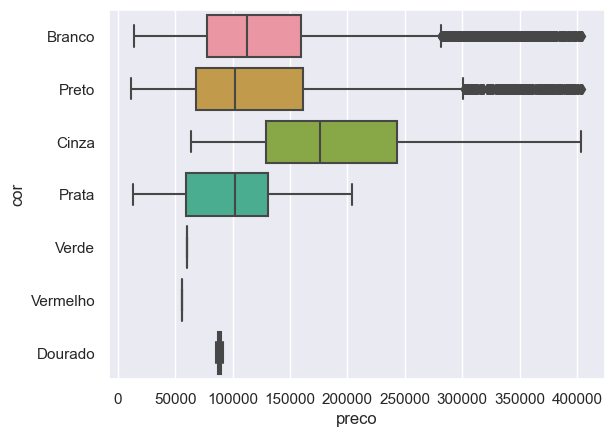

In [112]:
sns.boxplot(y = 'cor', x = 'preco', data = df_treino);

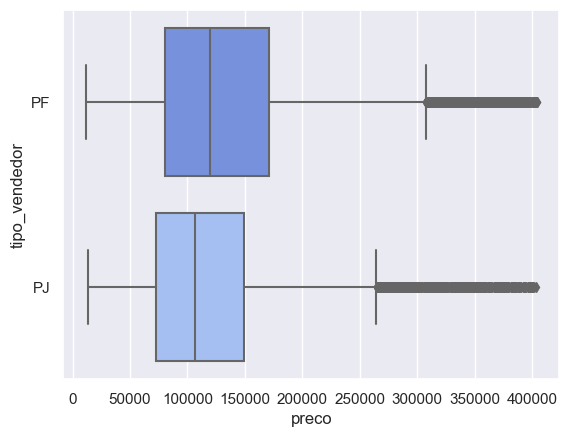

In [113]:
sns.boxplot(y = 'tipo_vendedor', x = 'preco', data = df_treino);

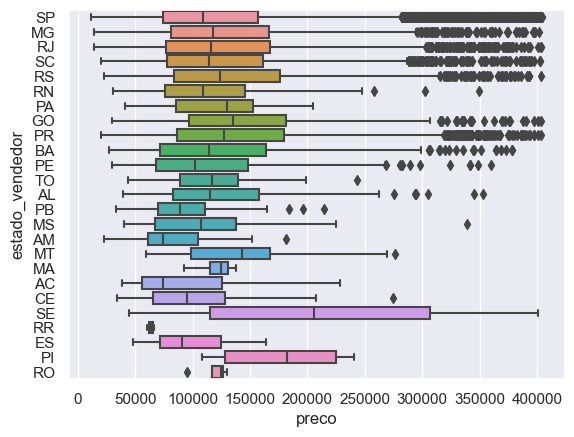

In [114]:
sns.boxplot(y = 'estado_vendedor', x = 'preco', data = df_treino);

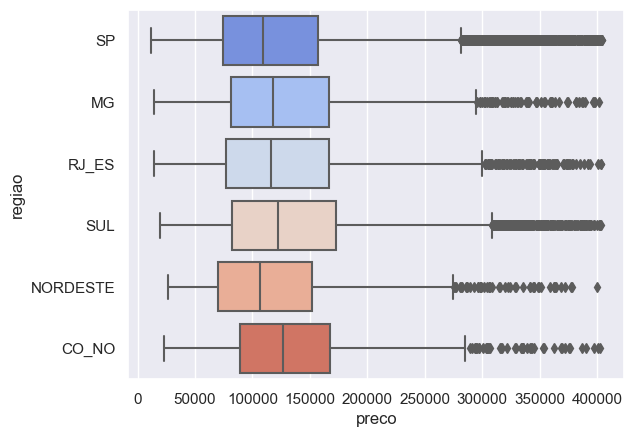

In [115]:
sns.boxplot(y = 'regiao', x = 'preco', data = df_treino);

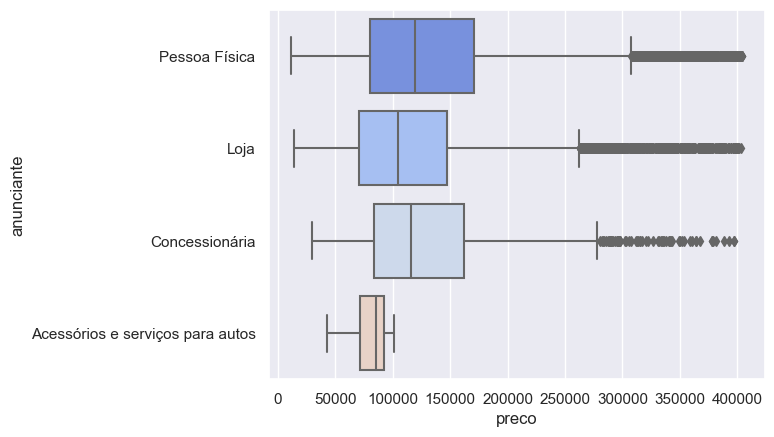

In [116]:
sns.boxplot(y = 'anunciante', x = 'preco', data = df_treino);

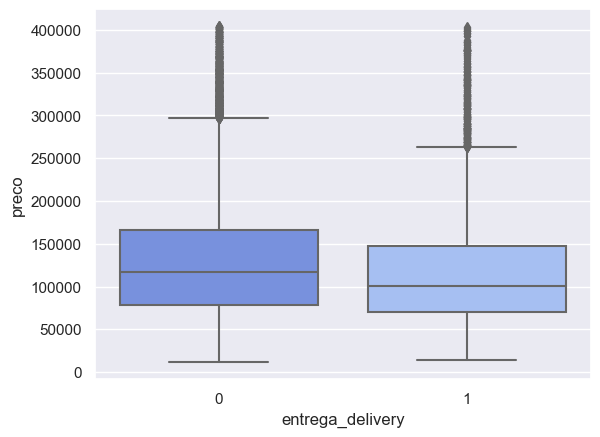

In [117]:
sns.boxplot(x = 'entrega_delivery', y = 'preco', data = df_treino);

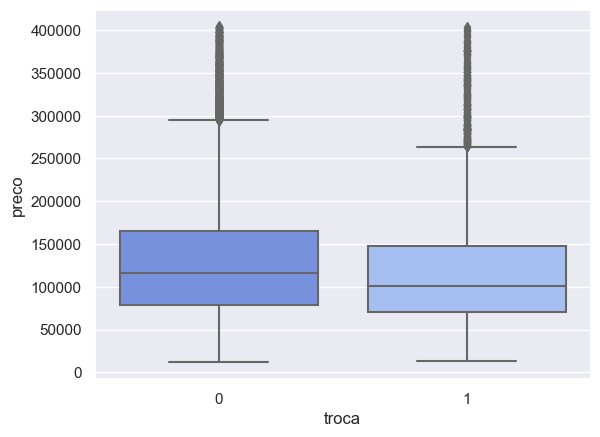

In [118]:
sns.boxplot(x = 'troca', y = 'preco', data = df_treino);

In [119]:
df_treino = df_treino.drop('estado_vendedor', axis=1)
df_teste = df_teste.drop('estado_vendedor', axis=1)

## Modelagem

In [120]:
def variaveis_dummie(df, coluna):
    """
  Cria as variáveis dummies de uma coluna ou uma lista de colunas de um dataframe.

  Args:
    df: Dataframe a ser tratado.
    columns: Lista de colunas a serem codificadas.

  Returns:
    Dataframe com as colunas codificadas.
    """

    for item in coluna:
        df_aux = pd.get_dummies(df[item], prefix=item)
        df = pd.concat([df, df_aux], axis=1)
        df.drop([item], axis=1, inplace=True)       
    return df

In [121]:
colunas_categoricas = df_treino.select_dtypes(include='object').columns


colunas_dimensionalidade = []

for coluna in colunas_categoricas:
    colunas_dimensionalidade.append(f'{coluna}_{df_treino[coluna].value_counts().idxmin()}')
                                    
colunas_dimensionalidade

['marca_FERRARI',
 'cambio_Automática Sequencial',
 'tipo_Minivan',
 'blindado_S',
 'cor_Verde',
 'tipo_vendedor_PJ',
 'anunciante_Acessórios e serviços para autos',
 'combustivel_ELETRICO',
 'regiao_CO_NO']

In [122]:
df_treino.columns

Index(['marca', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado', 'cor', 'tipo_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'preco', 'motor', 'combustivel',
       'idade_fabricacao', 'idade_modelo', 'regiao'],
      dtype='object')

In [123]:
df_treino.dtypes

marca                 object
hodometro            float64
cambio                object
num_portas             int64
tipo                  object
blindado              object
cor                   object
tipo_vendedor         object
anunciante            object
entrega_delivery       int64
troca                  int64
preco                float64
motor               category
combustivel           object
idade_fabricacao       int32
idade_modelo           int32
regiao                object
dtype: object

In [124]:
df_treino[['num_portas','entrega_delivery','troca','motor']] = df_treino[['num_portas','entrega_delivery','troca','motor']].astype(str)
df_teste[['num_portas','entrega_delivery','troca','motor']] = df_teste[['num_portas','entrega_delivery','troca','motor']].astype(str)

In [125]:
df_treino.dtypes

marca                object
hodometro           float64
cambio               object
num_portas           object
tipo                 object
blindado             object
cor                  object
tipo_vendedor        object
anunciante           object
entrega_delivery     object
troca                object
preco               float64
motor                object
combustivel          object
idade_fabricacao      int32
idade_modelo          int32
regiao               object
dtype: object

In [127]:
colunas_categoricas = df_treino.select_dtypes(include='object').columns

In [128]:
df_treino_final = variaveis_dummie(df_treino,colunas_categoricas)
df_teste_final = variaveis_dummie(df_teste,colunas_categoricas)

df_treino_final.head()

,hodometro,preco,idade_fabricacao,idade_modelo,marca_ALFA ROMEO,marca_AUDI,marca_BMW,marca_BRM,marca_CHERY,marca_CHEVROLET,marca_CHRYSLER,marca_CITROËN,marca_DODGE,marca_FERRARI,marca_FIAT,marca_FORD,marca_HONDA,marca_HYUNDAI,marca_IVECO,marca_JAC,marca_JAGUAR,marca_JEEP,marca_KIA,marca_LAND ROVER,marca_LEXUS,marca_LIFAN,marca_MASERATI,marca_MERCEDES-BENZ,marca_MINI,marca_MITSUBISHI,marca_NISSAN,marca_PEUGEOT,marca_PORSCHE,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO,cambio_Automatizada,cambio_Automatizada DCT,cambio_Automática,cambio_Automática Sequencial,cambio_CVT,cambio_Manual,cambio_Semi-automática,num_portas_2,num_portas_3,num_portas_4,tipo_Cupê,tipo_Hatchback,tipo_Minivan,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_N,blindado_S,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Verde,cor_Vermelho,tipo_vendedor_PF,tipo_vendedor_PJ,anunciante_Acessórios e serviços para autos,anunciante_Concessionária,anunciante_Loja,anunciante_Pessoa Física,entrega_delivery_0,entrega_delivery_1,troca_0,troca_1,motor_0.6,motor_1.0,motor_1.2,motor_1.3,motor_1.4,motor_1.5,motor_1.6,motor_1.7,motor_1.8,motor_1.9,motor_2.0,motor_2.1,motor_2.2,motor_2.3,motor_2.4,motor_2.5,motor_2.7,motor_2.8,motor_2.9,motor_3.0,motor_3.2,motor_3.3,motor_3.5,motor_3.6,motor_3.7,motor_3.8,motor_3.9,motor_4.0,motor_4.1,motor_4.2,motor_4.3,motor_4.4,motor_4.5,motor_4.6,motor_4.7,motor_4.8,motor_4.9,motor_5.0,motor_5.2,motor_5.5,motor_5.7,motor_6.2,motor_6.7,motor_outros,combustivel_DIESEL,combustivel_ELETRICO,combustivel_FLEX,combustivel_FLEXSTART,combustivel_GASOLINA,combustivel_HIBRIDO,combustivel_outros,regiao_CO_NO,regiao_MG,regiao_NORDESTE,regiao_RJ_ES,regiao_SP,regiao_SUL
0,67772.0,74732.590084,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,62979.0,81965.332634,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,44070.0,162824.814472,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,85357.0,123681.358857,10,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,71491.0,82419.763891,10,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [129]:
df_treino_final.drop(colunas_dimensionalidade, axis=1, inplace= True)

for coluna in colunas_dimensionalidade:
    if coluna in df_teste_final.columns:
        df_teste_final.drop(coluna, axis=1, inplace=True)
        
df_treino_final.head()

,hodometro,preco,idade_fabricacao,idade_modelo,marca_ALFA ROMEO,marca_AUDI,marca_BMW,marca_BRM,marca_CHERY,marca_CHEVROLET,marca_CHRYSLER,marca_CITROËN,marca_DODGE,marca_FIAT,marca_FORD,marca_HONDA,marca_HYUNDAI,marca_IVECO,marca_JAC,marca_JAGUAR,marca_JEEP,marca_KIA,marca_LAND ROVER,marca_LEXUS,marca_LIFAN,marca_MASERATI,marca_MERCEDES-BENZ,marca_MINI,marca_MITSUBISHI,marca_NISSAN,marca_PEUGEOT,marca_PORSCHE,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO,cambio_Automatizada,cambio_Automatizada DCT,cambio_Automática,cambio_CVT,cambio_Manual,cambio_Semi-automática,num_portas_2,num_portas_3,num_portas_4,tipo_Cupê,tipo_Hatchback,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_N,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,cor_Vermelho,tipo_vendedor_PF,anunciante_Concessionária,anunciante_Loja,anunciante_Pessoa Física,entrega_delivery_0,entrega_delivery_1,troca_0,troca_1,motor_0.6,motor_1.0,motor_1.2,motor_1.3,motor_1.4,motor_1.5,motor_1.6,motor_1.7,motor_1.8,motor_1.9,motor_2.0,motor_2.1,motor_2.2,motor_2.3,motor_2.4,motor_2.5,motor_2.7,motor_2.8,motor_2.9,motor_3.0,motor_3.2,motor_3.3,motor_3.5,motor_3.6,motor_3.7,motor_3.8,motor_3.9,motor_4.0,motor_4.1,motor_4.2,motor_4.3,motor_4.4,motor_4.5,motor_4.6,motor_4.7,motor_4.8,motor_4.9,motor_5.0,motor_5.2,motor_5.5,motor_5.7,motor_6.2,motor_6.7,motor_outros,combustivel_DIESEL,combustivel_FLEX,combustivel_FLEXSTART,combustivel_GASOLINA,combustivel_HIBRIDO,combustivel_outros,regiao_MG,regiao_NORDESTE,regiao_RJ_ES,regiao_SP,regiao_SUL
0,67772.0,74732.590084,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,62979.0,81965.332634,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,44070.0,162824.814472,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,85357.0,123681.358857,10,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,71491.0,82419.763891,10,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [130]:
colunas_comuns = set(df_treino_final.columns).intersection(df_teste_final.columns)

# Remova colunas do conjunto de teste que não foram usadas no treinamento
colunas_extras_teste = set(df_teste_final.columns) - colunas_comuns
df_teste_final.drop(colunas_extras_teste, axis=1, inplace=True)

In [132]:
# Verifique se todas as colunas usadas no treinamento também estão presentes no conjunto de teste
colunas_faltantes_teste = set(df_treino_final.columns) - set(df_teste_final.columns)

In [133]:
colunas_faltantes_teste

{'cor_Vermelho', 'marca_BRM', 'marca_IVECO', 'motor_1.9', 'motor_4.9', 'preco'}

In [134]:
df_treino_final.drop(['cor_Vermelho', 'marca_BRM', 'marca_IVECO', 'motor_1.9', 'motor_4.9'], axis=1, inplace= True)

In [135]:
print(df_treino_final.columns)

Index(['hodometro', 'preco', 'idade_fabricacao', 'idade_modelo', 'marca_ALFA ROMEO', 'marca_AUDI',
       'marca_BMW', 'marca_CHERY', 'marca_CHEVROLET', 'marca_CHRYSLER',
       ...
       'combustivel_FLEX', 'combustivel_FLEXSTART', 'combustivel_GASOLINA', 'combustivel_HIBRIDO',
       'combustivel_outros', 'regiao_MG', 'regiao_NORDESTE', 'regiao_RJ_ES', 'regiao_SP',
       'regiao_SUL'],
      dtype='object', length=122)


In [136]:
X = df_treino_final.drop(['preco'], axis=1)
y = df_treino_final['preco']

In [137]:
X.dtypes

hodometro           float64
idade_fabricacao      int32
idade_modelo          int32
marca_ALFA ROMEO      uint8
marca_AUDI            uint8
                     ...   
regiao_MG             uint8
regiao_NORDESTE       uint8
regiao_RJ_ES          uint8
regiao_SP             uint8
regiao_SUL            uint8
Length: 121, dtype: object

In [138]:
# Obtendo apenas as colunas numéricas do DataFrame original
colunas_numericas = X.select_dtypes(include=['float64', 'int64']).columns
colunas_numericas

Index(['hodometro'], dtype='object')

In [139]:
# importando StandardScaler
from sklearn.preprocessing import StandardScaler

# instanciando a função
scaler = StandardScaler()

# criando uma cópia dos valores
X_scaled = X.copy()

# aplicando a padronização
X_scaled[X_scaled.columns] = scaler.fit_transform(scaler.fit_transform(X_scaled))

X_scaled.head()

,hodometro,idade_fabricacao,idade_modelo,marca_ALFA ROMEO,marca_AUDI,marca_BMW,marca_CHERY,marca_CHEVROLET,marca_CHRYSLER,marca_CITROËN,marca_DODGE,marca_FIAT,marca_FORD,marca_HONDA,marca_HYUNDAI,marca_JAC,marca_JAGUAR,marca_JEEP,marca_KIA,marca_LAND ROVER,marca_LEXUS,marca_LIFAN,marca_MASERATI,marca_MERCEDES-BENZ,marca_MINI,marca_MITSUBISHI,marca_NISSAN,marca_PEUGEOT,marca_PORSCHE,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO,cambio_Automatizada,cambio_Automatizada DCT,cambio_Automática,cambio_CVT,cambio_Manual,cambio_Semi-automática,num_portas_2,num_portas_3,num_portas_4,tipo_Cupê,tipo_Hatchback,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_N,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,tipo_vendedor_PF,anunciante_Concessionária,anunciante_Loja,anunciante_Pessoa Física,entrega_delivery_0,entrega_delivery_1,troca_0,troca_1,motor_0.6,motor_1.0,motor_1.2,motor_1.3,motor_1.4,motor_1.5,motor_1.6,motor_1.7,motor_1.8,motor_2.0,motor_2.1,motor_2.2,motor_2.3,motor_2.4,motor_2.5,motor_2.7,motor_2.8,motor_2.9,motor_3.0,motor_3.2,motor_3.3,motor_3.5,motor_3.6,motor_3.7,motor_3.8,motor_3.9,motor_4.0,motor_4.1,motor_4.2,motor_4.3,motor_4.4,motor_4.5,motor_4.6,motor_4.7,motor_4.8,motor_5.0,motor_5.2,motor_5.5,motor_5.7,motor_6.2,motor_6.7,motor_outros,combustivel_DIESEL,combustivel_FLEX,combustivel_FLEXSTART,combustivel_GASOLINA,combustivel_HIBRIDO,combustivel_outros,regiao_MG,regiao_NORDESTE,regiao_RJ_ES,regiao_SP,regiao_SUL
0,0.310189,-0.042092,0.316350,-0.017577,-0.246637,-0.251301,-0.07265,-0.338388,-0.031562,-0.081439,-0.032633,-0.264692,-0.191802,-0.239031,-0.274144,-0.010147,-0.07047,-0.271093,-0.119162,-0.158597,-0.050456,-0.016571,-0.014351,-0.197124,-0.067967,-0.172703,8.104580,-0.246794,-0.098497,-0.071689,-0.137147,-0.019432,-0.021924,-0.037075,-0.037536,-0.281809,-0.078173,-0.430988,-0.099028,-0.068979,-0.04104,-1.787220,3.906625,-0.449872,-0.037536,-0.167795,-0.025543,0.169838,-0.023438,-0.448438,-0.027487,-0.437852,0.885354,-0.350790,0.088605,0.633360,-0.241029,-0.008285,-0.246167,-0.459160,0.810184,-0.248666,-0.710458,0.806006,0.505078,-0.505078,0.455320,-0.455320,-0.015501,-0.357052,-0.031012,-0.087018,-0.318835,-0.226161,2.416071,-0.021924,-0.291898,-0.736549,-0.015501,-0.077728,-0.06616,-0.077951,-0.094881,-0.081439,-0.175424,-0.022694,-0.207778,-0.148046,-0.073363,-0.059266,-0.076602,-0.0131,-0.032633,-0.0131,-0.04907,-0.011717,-0.028105,-0.008285,-0.048005,-0.0131,-0.023438,-0.0131,-0.026207,-0.041871,-0.008285,-0.025543,-0.017577,-0.035655,-0.070716,-0.04907,-0.419284,-1.098628,11.336470,-0.587799,-0.093956,-0.169516,-0.252687,-0.208496,-0.308807,0.899688,-0.529331
1,0.156909,-0.042092,0.316350,-0.017577,-0.246637,-0.251301,-0.07265,-0.338388,-0.031562,-0.081439,-0.032633,-0.264692,-0.191802,-0.239031,-0.274144,-0.010147,-0.07047,3.688769,-0.119162,-0.158597,-0.050456,-0.016571,-0.014351,-0.197124,-0.067967,-0.172703,-0.123387,-0.246794,-0.098497,-0.071689,-0.137147,-0.019432,-0.021924,-0.037075,-0.037536,-0.281809,-0.078173,-0.430988,-0.099028,-0.068979,-0.04104,0.559528,-0.255975,-0.449872,-0.037536,-0.167795,-0.025543,0.169838,-0.023438,-0.448438,-0.027487,-0.437852,0.885354,-0.350790,0.088605,0.633360,-0.241029,-0.008285,-0.246167,-0.459160,0.810184,-0.248666,-0.710458,0.806006,0.505078,-0.505078,0.455320,-0.455320,-0.015501,-0.357052,-0.031012,-0.087018,-0.318835,-0.226161,-0.413895,-0.021924,-0.291898,1.357683,-0.015501,-0.077728,-0.06616,-0.077951,-0.094881,-0.081439,-0.175424,-0.022694,-0.207778,-0.148046,-0.073363,-0.059266,-0.076602,-0.0131,-0.032633,-0.0131,-0.04907,-0.011717,-0.028105,-0.008285,-0.048005,-0.0131,-0.023438,-0.0131,-0.026207,-0.041871,-0.008285,-0.025543,-0.017577,-0.035655,-0.070716,-0.04907,-0.419284,0.910226,-0.088211,-0.587799,-0.093956,-0.169516,3.957464,-0.208496,-0.308807,-1.111497,-0.529331
2,-0.447799,-0.298545,-0.437587,-0.017577,-0.246637,-0.251301,-0.07265,-0.3

In [140]:
X_scaled.describe(exclude='uint8').round(2).T

,count,mean,std,min,25%,50%,75%,max
hodometro,29141.0,0.0,1.0,-1.85,-0.85,-0.02,0.76,3.22
idade_fabricacao,29141.0,0.0,1.0,-1.32,-0.81,-0.30,0.47,7.40
idade_modelo,29141.0,-0.0,1.0,-1.95,-0.81,-0.06,0.69,4.46
marca_ALFA ROMEO,29141.0,-0.0,1.0,-0.02,-0.02,-0.02,-0.02,56.89
marca_AUDI,29141.0,-0.0,1.0,-0.25,-0.25,-0.25,-0.25,4.05
...,...,...,...,...,...,...,...,...
regiao_MG,29141.0,0.0,1.0,-0.25,-0.25,-0.25,-0.25,3.96
regiao_NORDESTE,29141.0,-0.0,1.0,-0.21,-0.21,-0.21,-0.21,4.80
regiao_RJ_ES,29141.0,-0.0,1.0,-0.31,-0.31,-0.31,-0.31,3.24
regiao_SP,29141.0,0.0,1.0,-1.11,-1.11,0.90,0.90,0.90


In [141]:
X_scaled.shape

(29141, 121)

In [142]:
X_scaled.dropna()
X_scaled.shape

(29141, 121)

A tarefa da precificação é uma tarefa de aprendizado supervisionado, ou seja, o modelo aprende com exemplos anteriores.
Nesse caso específico, como o alvo é um valor deterrminado pelas características, trata-se de uma tarefa de regressão.

Alguns modelos diferentes serão experimentados

------------------------------------

# Regressão Linear Múltipla

------------------------

In [143]:
# importando statsmodels
import statsmodels.api as sm

In [144]:
# Adicionando a constante ao modelo de regressão linear múltipla
X_RLM = sm.add_constant(X_scaled)

# Ajustando o modelo
modelo_RLM = sm.OLS(y, X_RLM).fit()

# Exibindo os resultados
print(modelo_RLM.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     525.8
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:46:08   Log-Likelihood:            -3.5064e+05
No. Observations:               29141   AIC:                         7.015e+05
Df Residuals:                   29023   BIC:                         7.025e+05
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

----------------------------------------------
|Teste|Valor|
|:---|---|
|Omnibus|                     4859.174 |
|Durbin-Watson|                   1.976
|Prob(Omnibus)|                  0.000 |
|Jarque-Bera (JB)|            16408.458|
|Skew|                          0.839   |
|Prob(JB):        |                 0.00|
|Kurtosis|                       6.271   |

------------------------------------------------
O teste de Omnibus indica que há um problema de multicolinearidade nos dados. 

O `p-valor deo teste Omnibus é menor que 0,05`Isso significa que algumas das variáveis independentes estão correlacionadas entre si. Isso pode causar problemas com o modelo de regressão linear, pois pode fazer com que as estimativas dos coeficientes sejam imprecisas.

Essa é uma violação dos pressupostos da regressão linear, mostrando que esse modelo pode ser prejudicado.

In [145]:
# obtendo parâmetros do modelo
modelo_RLM.params

const               129716.177258
hodometro           -12846.854367
idade_fabricacao    -11573.295806
idade_modelo        -10499.410269
marca_ALFA ROMEO      -285.029696
                        ...      
regiao_MG              484.691171
regiao_NORDESTE         93.142513
regiao_RJ_ES           484.831634
regiao_SP             -187.518048
regiao_SUL            1102.682173
Length: 122, dtype: float64

In [146]:
# prevendo valores para X
y_pred_RLM = modelo_RLM.predict(X_RLM)

# calculando os resíduos
res_RLM = y - y_pred_RLM

In [147]:
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import meanabs

In [148]:
print('Modelo Regressão Linear Múltipla')
print(f"R2 = {round(modelo_RLM.rsquared,5)},\nR2 Ajustado = {round(modelo_RLM.rsquared_adj,5)}")

print(f"MSE: {round(mse(y, res_RLM),5)}")

print(f'MAE: {meanabs(y, res_RLM)}')

Modelo Regressão Linear Múltipla
R2 = 0.67944,
R2 Ajustado = 0.67815
MSE: 20334523283.10683
MAE: 129841.23900669735


## Verificando os pressupostos do modelo de regressão linear

### Multicolinearidade

O teste de Omnibus já acusou esse ponto de atenção.
Vamos usar fatores de inflação de variância (Variance Inflation Factors - VIF) para verificar se há multicolinearidade. Cada variável vai ter seu valor ***VIF*** calculado e consideraremos:

* Se `VIF > 10`, há indícios de que pode haver multicolinearidade

* Se `VIF > 100`, certamente há multicolinearidade entre as variáveis


Se alguma variável apresentar alto valor de ***VIF***, será removida do modelo.

In [149]:
# Calcular a matriz de correlação
correlation_matrix = X_RLM.corr()
correlation_matrix.unstack().loc[lambda x: abs(x) > 0.7]

hodometro         hodometro           1.000000
                  idade_fabricacao    0.714488
                  idade_modelo        0.796641
idade_fabricacao  hodometro           0.714488
                  idade_fabricacao    1.000000
                                        ...   
regiao_MG         regiao_MG           1.000000
regiao_NORDESTE   regiao_NORDESTE     1.000000
regiao_RJ_ES      regiao_RJ_ES        1.000000
regiao_SP         regiao_SP           1.000000
regiao_SUL        regiao_SUL          1.000000
Length: 155, dtype: float64

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Encontrando VIF para cada variável

VIF = [variance_inflation_factor(X_RLM.values, i) for i in range(X_RLM.shape[1])]

# exibindo o VIF para cada variável
for indice, vif in enumerate(VIF):
    print(f'{X_RLM.columns[indice]}: {vif}')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


const: 1.0
hodometro: 3.381266341716845
idade_fabricacao: 4.803380109760178
idade_modelo: 7.151393806876593
marca_ALFA ROMEO: 3.28379691455726
marca_AUDI: 400.5153374897841
marca_BMW: 414.06361585310447
marca_CHERY: 39.72754205483602
marca_CHEVROLET: 682.0776552878466
marca_CHRYSLER: 8.62629720580501
marca_CITROËN: 49.39852720339418
marca_DODGE: 9.03570691222456
marca_FIAT: 452.80920121485747
marca_FORD: 253.9941763393788
marca_HONDA: 379.21249999747494
marca_HYUNDAI: 481.0552256767187
marca_JAC: 1.762799627920987
marca_JAGUAR: 37.346713474062234
marca_JEEP: 472.43198620531314
marca_KIA: 103.0989274886896
marca_LAND ROVER: 178.02904239588452
marca_LEXUS: 19.85200434039734
marca_LIFAN: 3.030329774492001
marca_MASERATI: 2.53458197917825
marca_MERCEDES-BENZ: 267.00011596308775
marca_MINI: 34.82132637116427
marca_MITSUBISHI: 209.01832321564484
marca_NISSAN: 110.63911245943511
marca_PEUGEOT: 401.28596406937544
marca_PORSCHE: 71.33952323419392
marca_RAM: 111.40623807575587
marca_RENAULT: 134

In [151]:
# exibindo o VIF para cada variável com VIF maior que 100
for indice, vif in enumerate(VIF):
    if vif > 100:
        print(f'{X_RLM.columns[indice]}: {vif}')

marca_AUDI: 400.5153374897841
marca_BMW: 414.06361585310447
marca_CHEVROLET: 682.0776552878466
marca_FIAT: 452.80920121485747
marca_FORD: 253.9941763393788
marca_HONDA: 379.21249999747494
marca_HYUNDAI: 481.0552256767187
marca_JEEP: 472.43198620531314
marca_KIA: 103.0989274886896
marca_LAND ROVER: 178.02904239588452
marca_MERCEDES-BENZ: 267.00011596308775
marca_MITSUBISHI: 209.01832321564484
marca_NISSAN: 110.63911245943511
marca_PEUGEOT: 401.28596406937544
marca_RAM: 111.40623807575587
marca_RENAULT: 134.37074272053343
marca_TOYOTA: 505.14687943350845
marca_VOLKSWAGEN: 976.5790092182363
cambio_Automática: 234.13827565027833
cambio_Manual: 181.94370499148414
num_portas_2: inf
num_portas_3: inf
num_portas_4: inf
tipo_Hatchback: 583.1579289636255
tipo_Picape: 565.5620612080645
tipo_Sedã: 1028.9576044800208
tipo_Utilitário esportivo: 408.7760789875113
cor_Branco: 2994.4787302473806
cor_Cinza: 761.5377079959103
cor_Prata: 789.9058257651396
cor_Preto: 2106.7186695248447
anunciante_Concessio

In [152]:
colinearidade_muito_alta = []
# exibindo o VIF para cada variável com VIF maior que 100
for indice, vif in enumerate(VIF):
    if vif > 100:
        colinearidade_muito_alta.append(X_RLM.columns[indice])

In [153]:
X_RLM_2 = X_RLM.drop(colinearidade_muito_alta, axis=1)

In [154]:
# Encontrando VIF para cada variável

VIF = [variance_inflation_factor(X_RLM_2.values, i) for i in range(X_RLM_2.shape[1])]

# exibindo o VIF para cada variável
for indice, vif in enumerate(VIF):
    print(f'{X_RLM_2.columns[indice]}: {vif}')

const: 1.0
hodometro: 2.990339130574633
idade_fabricacao: 4.414865546856475
idade_modelo: 5.964540265641725
marca_ALFA ROMEO: 1.0125616073884343
marca_CHERY: 1.0309593443385623
marca_CHRYSLER: 1.211617231284272
marca_CITROËN: 1.068883417770381
marca_DODGE: 1.2685352064600763
marca_JAC: 1.0005113666606849
marca_JAGUAR: 1.009921851325938
marca_LEXUS: 1.0429607265639194
marca_LIFAN: 1.000613500897446
marca_MASERATI: 1.009081788830578
marca_MINI: 1.0066235030752002
marca_PORSCHE: 1.2226881534600442
marca_SMART: 1.007795991417928
marca_SSANGYONG: 1.0025701318939302
marca_SUBARU: 1.049763396489697
marca_SUZUKI: 1.014380746029159
marca_TROLLER: 1.0081995063019702
marca_VOLVO: 1.006931304050508
cambio_Automatizada: 1.009637874125509
cambio_Automatizada DCT: 1.0457577894230001
cambio_CVT: 1.0473315149880942
cambio_Semi-automática: 1.003722233697616
tipo_Cupê: 1.0209944335537413
tipo_Perua/SW: 1.0124007193555293
blindado_N: 1.047360233783186
cor_Dourado: 1.0004104747481584
tipo_vendedor_PF: 1.13

In [155]:
# Ajustando o modelo
modelo_RLM_2 = sm.OLS(y, X_RLM_2).fit()

# Exibindo os resultados
print(modelo_RLM_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:46:27   Log-Likelihood:            -3.6323e+05
No. Observations:               29141   AIC:                         7.266e+05
Df Residuals:                   29074   BIC:                         7.272e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

In [156]:
# prevendo valores para X
y_pred_RLM_2 = modelo_RLM_2.predict(X_RLM_2)

# calculando os resíduos
res_RLM_2 = y - y_pred_RLM_2

In [157]:
print('Modelo Regressão Linear Múltipla após retirada colinearidade')
print(f"R2 = {round(modelo_RLM_2.rsquared,5)},\nR2 Ajustado = {round(modelo_RLM_2.rsquared_adj,5)}")

print(f"MSE: {round(mse(y, res_RLM_2),5)}")

print(f'MAE: {meanabs(y, res_RLM_2)}')

Modelo Regressão Linear Múltipla após retirada colinearidade
R2 = 0.23919,
R2 Ajustado = 0.23746
MSE: 18061319723.86609
MAE: 129743.31538659385


1. Modelo Regressão Linear Múltipla
* R2 = 0.67948
* R2 Ajustado = 0.67814
* MSE: 20334736037.47731
* MAE: 129841.69365595553

2. Modelo Regressão Linear Múltipla após retirada colinearidade
* R2 = 0.20133,
* R2 Ajustado = 0.19954
* MSE: 17865822840.86602
* MAE: 129737.46464868986

### Homocedasticidade dos Resíduos:

Vamos checar a homocedasticidade com um teste de hipótese: Goldfeld Quandt.
Este teste pode ser realizado importando-se a função `statsmodels.stats.api.het_goldfeldquandt()`.

In [158]:
from statsmodels.stats.api import het_goldfeldquandt

In [159]:
stat, p_valor, _ = het_goldfeldquandt(res_RLM_2, X_RLM_2)
print(round(p_valor,5))

0.18964


No caso da heterocedasticidade, um p-valor de 0.36665 significa que não há evidências suficientes para rejeitar a hipótese nula de que a variância dos resíduos é constante ao longo do modelo. Em outras palavras, não há evidências suficientes para concluir que os dados são heterocedásticos.

## Normalidade dos Resíduos

Vamos checar a normalidadde dos resíduos usando o teste de hipóteses de Kolmogorov-Smirnov.

Podemos realizar este teste importando a função `scipy.stats.ktest()`.

In [160]:
from scipy import stats
from scipy.stats import kstest


stat, p_valor = kstest(res_RLM_2,stats.norm.cdf)
print(round(p_valor,5))

0.0


O resultado de 0 para o p-valor do teste de Kolmogorov-Smirnov significa que há fortes evidências contra a hipótese nula de que os resíduos são distribuídos normalmente. Em outras palavras, os resíduos não são distribuídos normalmente.

------------------------------------

XGBoost

------------------------------------

In [161]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [162]:


# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Converter os dados para o formato específico do XGBoost (DMatrix)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir os parâmetros do modelo
params = {
    'objective': 'reg:squarederror',  # Função objetivo para regressão
    'eval_metric': 'rmse'  # Métrica de avaliação: Root Mean Squared Error (RMSE)
}

# Treinar o modelo
model = xgb.train(params, dtrain)

# Fazer previsões no conjunto de teste
y_pred = model.predict(dtest)



In [163]:
# Calcular o erro médio quadrático (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


# Converter os dados de teste para o formato DMatrix
dtest = xgb.DMatrix(X_test)

# Fazer previsões no conjunto de teste
xgb_predictions = model.predict(dtest)

# Calcular as métricas de avaliação
xgb_r2_score = r2_score(y_test, xgb_predictions)

xgb_mse_score = mean_squared_error(y_test, xgb_predictions)
xgb_mae_score = mean_absolute_error(y_test, xgb_predictions)

# Imprimir os resultados
print("XGBoost:")
print(f"RMSE: {rmse}")
print(f"R2: {xgb_r2_score}")

print(f"MSE: {xgb_mse_score}")
print(f"MAE: {xgb_mae_score}\n")

XGBoost:
RMSE: 38325.04232832879
R2: 0.7065880403903588
MSE: 1468808869.4681933
MAE: 27795.142101393627



Random forest regressor

In [164]:
# Importar as bibliotecas necessárias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error


# Carregar os dados de treinamento e teste
# Suponha que você tenha duas matrizes numpy: X_train e y_train para treinamento
# e X_test e y_test para teste

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Instanciar o modelo Random Forest para regressão
rf_model = RandomForestRegressor()

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)



In [165]:
# Calcular as métricas de avaliação
rf_r2 = r2_score(y_test, y_pred)

rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
# Calcular o erro médio quadrático (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Imprimir os resultados
print("Random Forest:")
print(f"RMSE: {rmse}")
print(f"R2: {rf_r2}")
print(f"MSE: {rf_mse}")
print(f"MAE: {rf_mae}")

Random Forest:
RMSE: 36951.5112933925
R2: 0.7272423522387034
MSE: 1365414186.8657131
MAE: 26522.847509756528




1. Random Forest:

- RMSE: 36968.916501315565
- R2: 0.7269853385747733
- MSE: 1366700787.2812424
- MAE: 26607.648021406767

2. XGBoost:

- RMSE: 38325.04232832879
- R2: 0.7065880403903588
- MSE: 1468808869.4681933
- MAE: 27795.142101393627

3. Modelo Regressão Linear Múltipla:

- R2: 0.67948
- R2 Ajustado: 0.67814
- MSE: 20334736037.47731
- MAE: 129841.69365595553

4. Modelo Regressão Linear Múltipla após retirada colinearidade:

- R2: 0.20133
- R2 Ajustado: 0.19954
- MSE: 17865822840.86602
- MAE: 129737.46464868986


O melhor modelo testado foi o regressor random forest.
Possuindo o maior valor de R2 (0.7269853385747733), indicando um ajuste mais forte aos dados em comparação com os outros modelos.
Apresenta um menor MSE (1366700787.2812424) e MAE (26607.648021406767), o que significa que tem uma menor média de erros em relação aos valores reais.

In [166]:
teste = df_treino_final.copy()
teste['preco2'] =  rf_model.predict(X_scaled)
teste['diferença'] = teste['preco2'] - teste['preco']

In [167]:
teste.head() 

,hodometro,preco,idade_fabricacao,idade_modelo,marca_ALFA ROMEO,marca_AUDI,marca_BMW,marca_CHERY,marca_CHEVROLET,marca_CHRYSLER,marca_CITROËN,marca_DODGE,marca_FIAT,marca_FORD,marca_HONDA,marca_HYUNDAI,marca_JAC,marca_JAGUAR,marca_JEEP,marca_KIA,marca_LAND ROVER,marca_LEXUS,marca_LIFAN,marca_MASERATI,marca_MERCEDES-BENZ,marca_MINI,marca_MITSUBISHI,marca_NISSAN,marca_PEUGEOT,marca_PORSCHE,marca_RAM,marca_RENAULT,marca_SMART,marca_SSANGYONG,marca_SUBARU,marca_SUZUKI,marca_TOYOTA,marca_TROLLER,marca_VOLKSWAGEN,marca_VOLVO,cambio_Automatizada,cambio_Automatizada DCT,cambio_Automática,cambio_CVT,cambio_Manual,cambio_Semi-automática,num_portas_2,num_portas_3,num_portas_4,tipo_Cupê,tipo_Hatchback,tipo_Perua/SW,tipo_Picape,tipo_Sedã,tipo_Utilitário esportivo,blindado_N,cor_Branco,cor_Cinza,cor_Dourado,cor_Prata,cor_Preto,tipo_vendedor_PF,anunciante_Concessionária,anunciante_Loja,anunciante_Pessoa Física,entrega_delivery_0,entrega_delivery_1,troca_0,troca_1,motor_0.6,motor_1.0,motor_1.2,motor_1.3,motor_1.4,motor_1.5,motor_1.6,motor_1.7,motor_1.8,motor_2.0,motor_2.1,motor_2.2,motor_2.3,motor_2.4,motor_2.5,motor_2.7,motor_2.8,motor_2.9,motor_3.0,motor_3.2,motor_3.3,motor_3.5,motor_3.6,motor_3.7,motor_3.8,motor_3.9,motor_4.0,motor_4.1,motor_4.2,motor_4.3,motor_4.4,motor_4.5,motor_4.6,motor_4.7,motor_4.8,motor_5.0,motor_5.2,motor_5.5,motor_5.7,motor_6.2,motor_6.7,motor_outros,combustivel_DIESEL,combustivel_FLEX,combustivel_FLEXSTART,combustivel_GASOLINA,combustivel_HIBRIDO,combustivel_outros,regiao_MG,regiao_NORDESTE,regiao_RJ_ES,regiao_SP,regiao_SUL,preco2,diferença
0,67772.0,74732.590084,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,75751.953908,1019.363824
1,62979.0,81965.332634,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,91854.786305,9889.453671
2,44070.0,162824.814472,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,186306.700046,23481.885574
3,85357.0,123681.358857,10,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,130561.782601,6880.423744
4,71491.0,82419.763891,10,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,112437.826549,30018.062658


In [168]:
sum(teste['diferença'])

13252119.119980399

O modelo tem uma tendência a errar para mais, logo, há margem para negociações de descontos.

In [169]:
rf_model.predict(df_teste_final)

array([44100.47621566, 49588.69767133, 43034.50781366, ...,
       41966.85557896, 42367.84934071, 43733.96126857])

In [172]:
resultados = pd.DataFrame(rf_model.predict(df_teste_final))

In [174]:
resultados.to_csv('predicted.csv', index=True)

****************************


In [175]:
!pip install pipreqs

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13775 sha256=73ac68c030d23a245b37b669de962cd5b7e69159de001cb775001df76196b10e
  Stored in directory: c:\users\raphael\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
!pipreqs .